In [1]:
import numpy as np
import pandas as pd
from pandas import datetime
from datetime import datetime

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns # advanced vizs
%matplotlib inline

# statistics
from statsmodels.distributions.empirical_distribution import ECDF

# time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import warnings
warnings.filterwarnings("ignore")

<ipython-input-1-9d178915f3f3>:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [2]:
dfs=pd.read_csv(r"C:\Users\bvars\Downloads\Sparkling.csv")
dfr=pd.read_csv(r"C:\Users\bvars\Downloads\Rose.csv")

In [3]:
dfs.head()

,YearMonth,Sparkling
0,1980-01,1686
1,1980-02,1591
2,1980-03,2304
3,1980-04,1712
4,1980-05,1471


In [5]:
dfs.tail()

,YearMonth,Sparkling
182,1995-03,1897
183,1995-04,1862
184,1995-05,1670
185,1995-06,1688
186,1995-07,2031


In [6]:
dfr.head()

,YearMonth,Rose
0,1980-01,112.0
1,1980-02,118.0
2,1980-03,129.0
3,1980-04,99.0
4,1980-05,116.0


In [7]:
dfr.tail()

,YearMonth,Rose
182,1995-03,45.0
183,1995-04,52.0
184,1995-05,28.0
185,1995-06,40.0
186,1995-07,62.0


 ## Creating the Time Stamps and adding to the data frame to make it a Time Series Data

In [8]:
date=pd.date_range(start='1/1/1980',end='8/1/1995',freq='M')
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

## Creating a combined dataframe


In [10]:
df = pd.DataFrame({'YearMonth':date,
                   'Sparkling':dfs.Sparkling,
                   'Rose':dfr.Rose})
df.set_index('YearMonth',inplace=True)

In [11]:
df.head()

,Sparkling,Rose
YearMonth,,
1980-01-31,1686,112.0
1980-02-29,1591,118.0
1980-03-31,2304,129.0
1980-04-30,1712,99.0
1980-05-31,1471,116.0


In [12]:
df.tail()

,Sparkling,Rose
YearMonth,,
1995-03-31,1897,45.0
1995-04-30,1862,52.0
1995-05-31,1670,28.0
1995-06-30,1688,40.0
1995-07-31,2031,62.0


In [13]:
df.describe()

,Sparkling,Rose
count,187.000000,185.000000
mean,2402.417112,90.394595
std,1295.111540,39.175344
min,1070.000000,28.000000
25%,1605.000000,63.000000
50%,1874.000000,86.000000
75%,2549.000000,112.000000
max,7242.000000,267.000000


In [14]:
df.isnull().sum()

Sparkling    0
Rose         2
dtype: int64

Text(0, 0.5, 'Units Sold')

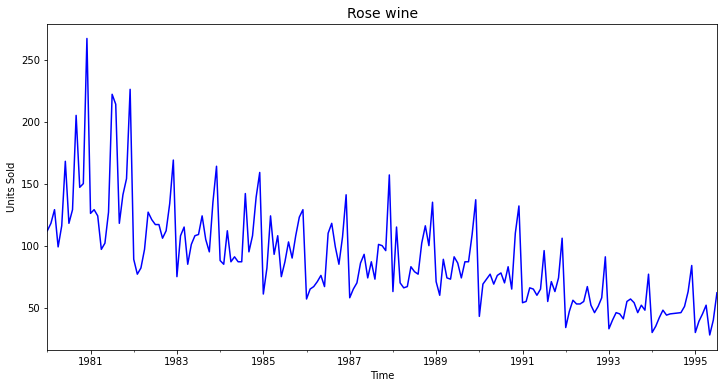

In [239]:
plt.figure(figsize = (12, 6))
df.Rose.plot(color='blue')
plt.title('Rose wine', fontsize=14)
plt.xlabel('Time')
plt.ylabel('Units Sold')

In [17]:
df['1994']

,Sparkling,Rose
YearMonth,,
1994-01-31,1197,30.0
1994-02-28,1968,35.0
1994-03-31,1720,42.0
1994-04-30,1725,48.0
1994-05-31,1674,44.0
1994-06-30,1693,45.0
1994-07-31,2031,NaN
1994-08-31,1495,NaN
1994-09-30,2968,46.0


In [19]:
#impute missing value
df.converted  = df.Rose
ts = df.converted.resample('D').mean() 
df.Rose = ts.interpolate(method = 'linear')
df.Rose['1994']

YearMonth
1994-01-31    30.000000
1994-02-28    35.000000
1994-03-31    42.000000
1994-04-30    48.000000
1994-05-31    44.000000
1994-06-30    45.000000
1994-07-31    45.336957
1994-08-31    45.673913
1994-09-30    46.000000
1994-10-31    51.000000
1994-11-30    63.000000
1994-12-31    84.000000
Name: Rose, dtype: float64

In [20]:
df.isnull().sum()

Sparkling    0
Rose         0
dtype: int64

## plotting time series to understand the behaviour

Text(0, 0.5, 'Units Sold')

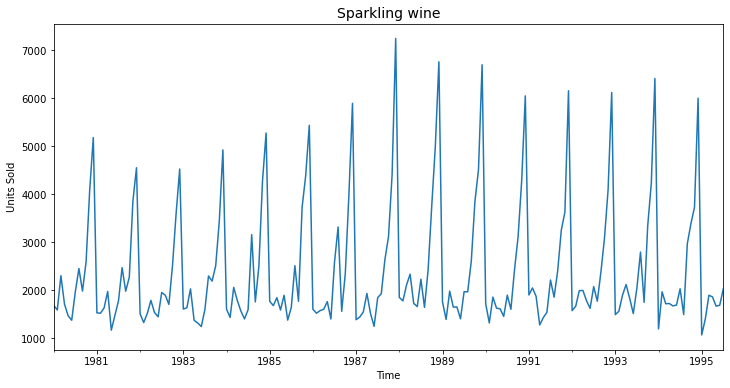

In [241]:
plt.figure(figsize = (12, 6))
df.Sparkling.plot()
plt.title('Sparkling wine', fontsize=14)
plt.xlabel('Time')
plt.ylabel('Units Sold')

Text(0, 0.5, 'Distribution')

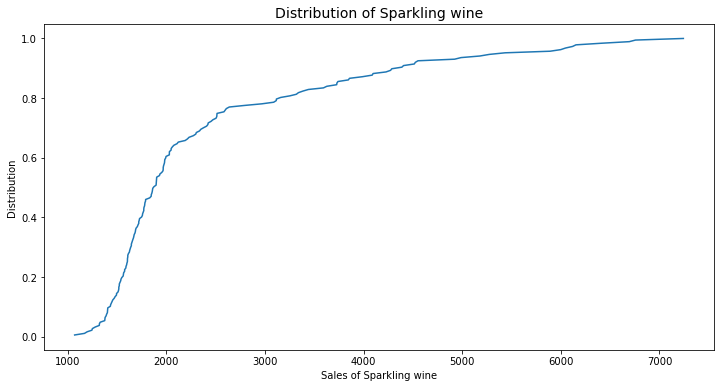

In [242]:
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (12, 6))
cdf = ECDF(df['Sparkling'])
plt.plot(cdf.x, cdf.y, label = "statmodels")
plt.title('Distribution of Sparkling wine', fontsize=14)
plt.xlabel('Sales of Sparkling wine')
plt.ylabel('Distribution')

Text(0, 0.5, 'Units Sold')

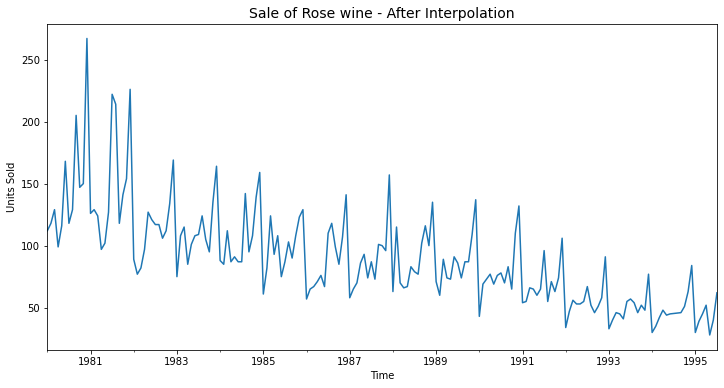

In [243]:
plt.figure(figsize = (12, 6))
df.Rose.plot()
plt.title('Sale of Rose wine - After Interpolation', fontsize =14)
plt.xlabel('Time')
plt.ylabel('Units Sold')

Text(0, 0.5, 'Distribution')

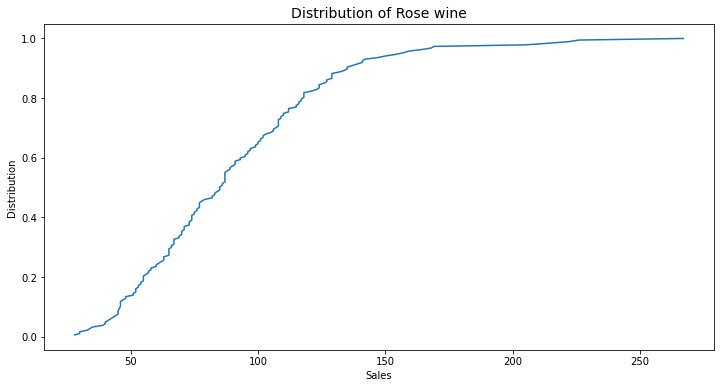

In [244]:
plt.figure(figsize = (12, 6))
cdf = ECDF(df['Rose'])
plt.plot(cdf.x, cdf.y, label = "statmodels")
plt.title('Distribution of Rose wine', fontsize=14)
plt.xlabel('Sales')
plt.ylabel('Distribution')

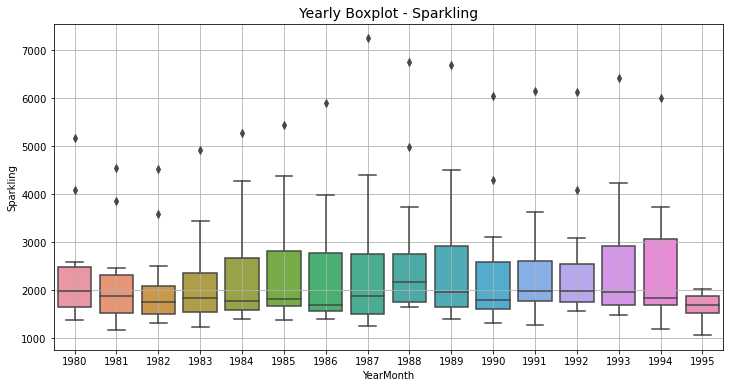

In [304]:
plt.figure(figsize=(12,6))
sns.boxplot(x=df.index.year,y=df['Sparkling'])
plt.title('Yearly Boxplot - Sparkling', fontsize=14)
plt.grid();

Text(0.5, 1.0, 'Monthly Boxplot - Rose')

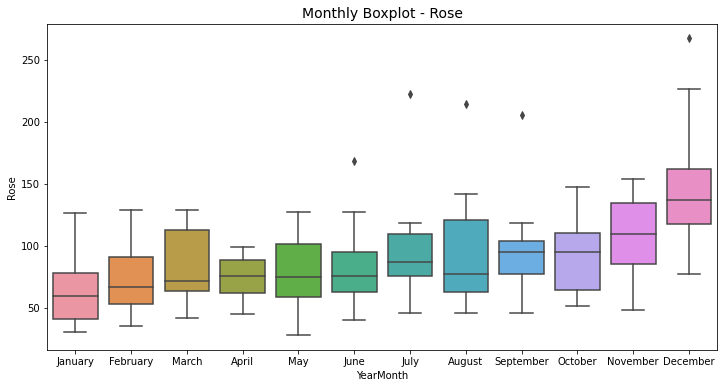

In [306]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = df.index.month_name(),y = df['Rose'])
plt.title('Monthly Boxplot - Rose', fontsize=14)

## Sparkling

In [31]:
monthly_sales_across_years = pd.pivot_table(df, values = 'Sparkling', columns = df.index.month, index = df.index.year)
monthly_sales_across_years

YearMonth,1,2,3,4,5,6,7,8,9,10,11,12
YearMonth,,,,,,,,,,,,
1980,1686.0,1591.0,2304.0,1712.0,1471.0,1377.0,1966.0,2453.0,1984.0,2596.0,4087.0,5179.0
1981,1530.0,1523.0,1633.0,1976.0,1170.0,1480.0,1781.0,2472.0,1981.0,2273.0,3857.0,4551.0
1982,1510.0,1329.0,1518.0,1790.0,1537.0,1449.0,1954.0,1897.0,1706.0,2514.0,3593.0,4524.0
1983,1609.0,1638.0,2030.0,1375.0,1320.0,1245.0,1600.0,2298.0,2191.0,2511.0,3440.0,4923.0
1984,1609.0,1435.0,2061.0,1789.0,1567.0,1404.0,1597.0,3159.0,1759.0,2504.0,4273.0,5274.0
1985,1771.0,1682.0,1846.0,1589.0,1896.0,1379.0,1645.0,2512.0,1771.0,3727.0,4388.0,5434.0
1986,1606.0,1523.0,1577.0,1605.0,1765.0,1403.0,2584.0,3318.0,1562.0,2349.0,3987.0,5891.0
1987,1389.0,1442.0,1548.0,1935.0,1518.0,1250.0,1847.0,1930.0,2638.0,3114.0,4405.0,7242.0
1988,1853.0,1779.0,2108.0,2336.0,1728.0,1661.0,2230.0,1645.0,2421.0,3740.0,4988.0,6757.0


Text(0.5, 1.0, 'Sparkling - Monthly sales over years')

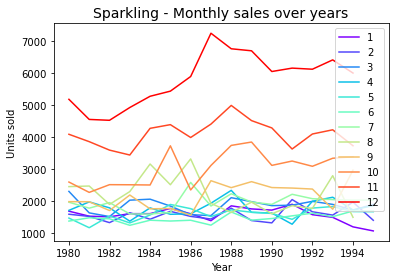

In [32]:
monthly_sales_across_years.plot(colormap='rainbow')
plt.legend(loc='best')
plt.ylabel('Units sold')
plt.xlabel('Year')
plt.title('Sparkling - Monthly sales over years', fontsize=14)

## Rose

In [33]:
monthly_sales_across_years = pd.pivot_table(df, values = 'Rose', columns = df.index.month, index = df.index.year)
monthly_sales_across_years

YearMonth,1,2,3,4,5,6,7,8,9,10,11,12
YearMonth,,,,,,,,,,,,
1980,112.0,118.0,129.0,99.0,116.0,168.0,118.000000,129.000000,205.0,147.0,150.0,267.0
1981,126.0,129.0,124.0,97.0,102.0,127.0,222.000000,214.000000,118.0,141.0,154.0,226.0
1982,89.0,77.0,82.0,97.0,127.0,121.0,117.000000,117.000000,106.0,112.0,134.0,169.0
1983,75.0,108.0,115.0,85.0,101.0,108.0,109.000000,124.000000,105.0,95.0,135.0,164.0
1984,88.0,85.0,112.0,87.0,91.0,87.0,87.000000,142.000000,95.0,108.0,139.0,159.0
1985,61.0,82.0,124.0,93.0,108.0,75.0,87.000000,103.000000,90.0,108.0,123.0,129.0
1986,57.0,65.0,67.0,71.0,76.0,67.0,110.000000,118.000000,99.0,85.0,107.0,141.0
1987,58.0,65.0,70.0,86.0,93.0,74.0,87.000000,73.000000,101.0,100.0,96.0,157.0
1988,63.0,115.0,70.0,66.0,67.0,83.0,79.000000,77.000000,102.0,116.0,100.0,135.0


Text(0.5, 1.0, 'Rose - Monthly sales over years')

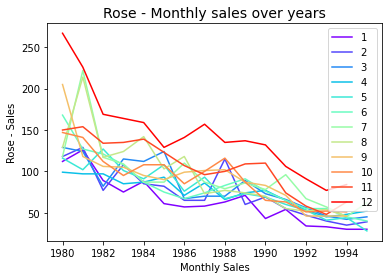

In [34]:
monthly_sales_across_years.plot(colormap='rainbow')
plt.legend(loc='best')
plt.ylabel('Rose - Sales')
plt.xlabel('Monthly Sales')
plt.title('Rose - Monthly sales over years', fontsize=14)

## Decompostion
### Sparkling


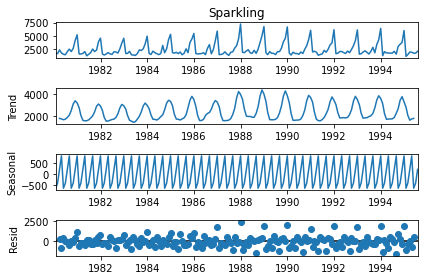

<Figure size 1440x720 with 0 Axes>

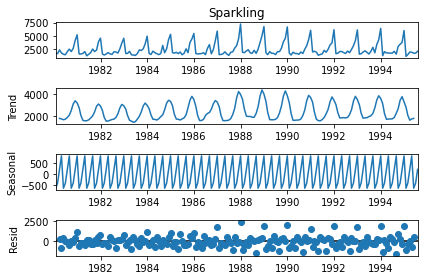

In [317]:
# additive decomposition
plt.figure(figsize=(20,10))

decomposition = seasonal_decompose(df['Sparkling'],model='additive', freq=4)
decomposition.plot()

In [46]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-31         NaN
1980-02-29         NaN
1980-03-31    1796.375
1980-04-30    1742.750
1980-05-31    1673.750
1980-06-30    1724.125
1980-07-31    1880.875
1980-08-31    2097.375
1980-09-30    2514.875
1980-10-31    3120.750
1980-11-30    3404.750
1980-12-31    3213.875
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-31   -633.469867
1980-02-29   -402.919203
1980-03-31    214.445894
1980-04-30    821.943176
1980-05-31   -633.469867
1980-06-30   -402.919203
1980-07-31    214.445894
1980-08-31    821.943176
1980-09-30   -633.469867
1980-10-31   -402.919203
1980-11-30    214.445894
1980-12-31    821.943176
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-31            NaN
1980-02-29            NaN
1980-03-31     293.179106
1980-04-30    -852.693176
1980-05-31     430.719867
1980-06-30      55.794203
1980-07-31    -129.320894
1980-08-31    -466.318176
1980-09-30     102.594867
1980-10-31    -121.830797
1980-11-30     467.804106
1980-12-31  

## multiplicative

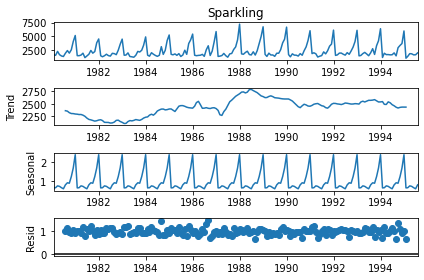

In [48]:
decomposition = seasonal_decompose(df['Sparkling'],model='multiplicative')
decomposition.plot();

In [49]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2360.666667
1980-08-31    2351.333333
1980-09-30    2320.541667
1980-10-31    2303.583333
1980-11-30    2302.041667
1980-12-31    2293.791667
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-31    0.649843
1980-02-29    0.659214
1980-03-31    0.757440
1980-04-30    0.730351
1980-05-31    0.660609
1980-06-30    0.603468
1980-07-31    0.809164
1980-08-31    0.918822
1980-09-30    0.894367
1980-10-31    1.241789
1980-11-30    1.690158
1980-12-31    2.384776
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    1.029230
1980-08-31    1.135407
1980-09-30    0.955954
1980-10-31    0.907513
1980-11-30    1.050423
1980-12-31    0.946770
Name: resi

### Rose

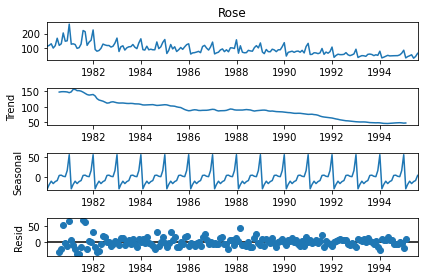

In [51]:
#additive
decomposition = seasonal_decompose(df['Rose'],model='additive')
decomposition.plot();

In [52]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n');

Trend 
 YearMonth
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    147.083333
1980-08-31    148.125000
1980-09-30    148.375000
1980-10-31    148.083333
1980-11-30    147.416667
1980-12-31    145.125000
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-31   -27.908708
1980-02-29   -17.435675
1980-03-31    -9.285895
1980-04-30   -15.098395
1980-05-31   -10.196609
1980-06-30    -7.678752
1980-07-31     4.897089
1980-08-31     5.500109
1980-09-30     2.774625
1980-10-31     1.871848
1980-11-30    16.846848
1980-12-31    55.713514
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-31          NaN
1980-02-29          NaN
1980-03-31          NaN
1980-04-30          NaN
1980-05-31          NaN
1980-06-30          NaN
1980-07-31   -33.980423
1980-08-31   -24.625109
1980-09-30    53.850375
1980-10-31    -2.955181
1980-11-30   -14.263514
1980-12-31    66.16148

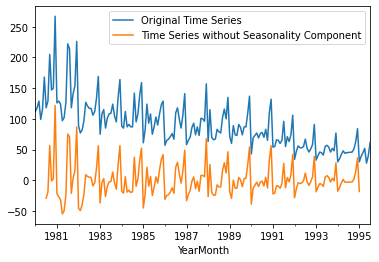

In [53]:
detrend_ts = seasonality + residual
df.Rose.plot()
detrend_ts.plot()
plt.legend(["Original Time Series", "Time Series without Seasonality Component"]);

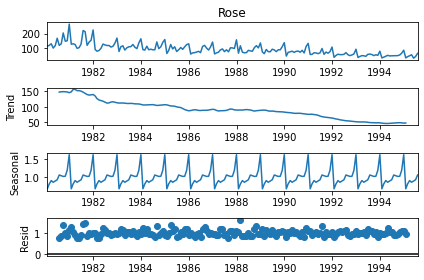

In [54]:
#mulitplicative
decomposition = seasonal_decompose(df['Rose'],model='multiplicative')
decomposition.plot();

In [55]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n');

Trend 
 YearMonth
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    147.083333
1980-08-31    148.125000
1980-09-30    148.375000
1980-10-31    148.083333
1980-11-30    147.416667
1980-12-31    145.125000
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-31    0.670111
1980-02-29    0.806163
1980-03-31    0.901163
1980-04-30    0.854023
1980-05-31    0.889414
1980-06-30    0.923984
1980-07-31    1.058042
1980-08-31    1.035890
1980-09-30    1.017647
1980-10-31    1.022572
1980-11-30    1.192347
1980-12-31    1.628644
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    0.758256
1980-08-31    0.840713
1980-09-30    1.357675
1980-10-31    0.970772
1980-11-30    0.853379
1980-12-31    1.129647
Name: resid, dtype: fl

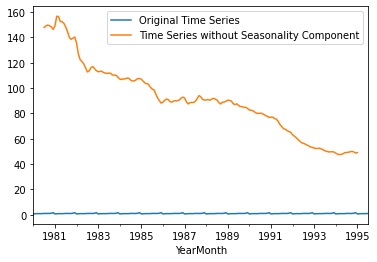

In [56]:
detrend_ts = trend + residual
#df.Rose.plot()
seasonality.plot()
detrend_ts.plot()
plt.legend(["Original Time Series", "Time Series without Seasonality Component"]);

## Spliting the time series

In [57]:
train=df[df.index.year < 1991]
test=df[df.index.year >= 1991]

In [59]:
train.head()

,Sparkling,Rose
YearMonth,,
1980-01-31,1686,112.0
1980-02-29,1591,118.0
1980-03-31,2304,129.0
1980-04-30,1712,99.0
1980-05-31,1471,116.0


In [60]:
test.head()

,Sparkling,Rose
YearMonth,,
1991-01-31,1902,54.0
1991-02-28,2049,55.0
1991-03-31,1874,66.0
1991-04-30,1279,65.0
1991-05-31,1432,60.0


In [62]:
print(train.shape)
print(test.shape)

(132, 2)
(55, 2)


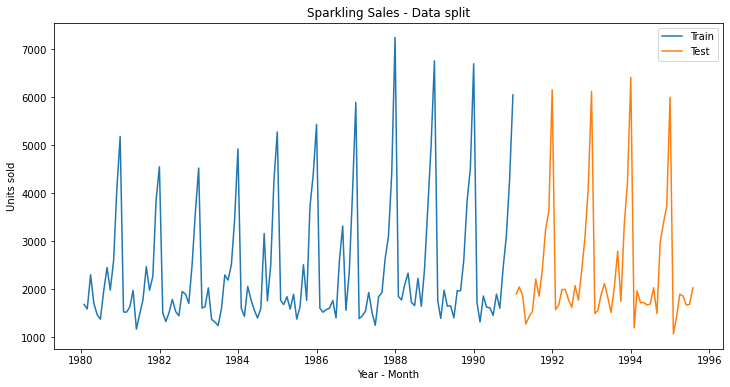

In [246]:
plt.figure(figsize = (12, 6))
plt.plot(train['Sparkling'], label = 'Train')
plt.plot(test['Sparkling'], label = 'Test')
plt.legend(loc='best')
plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Sparkling Sales - Data split', fontsize = 12)
plt.show;

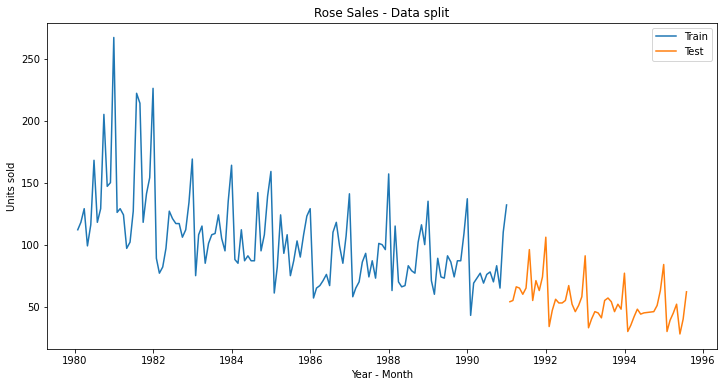

In [245]:
plt.figure(figsize = (12, 6))
plt.plot(train['Rose'], label = 'Train')
plt.plot(test['Rose'], label = 'Test')
plt.legend(loc='best')
plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Rose Sales - Data split', fontsize = 12)
plt.show;

## Model - Linear Regression

In [65]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [66]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [67]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

In [68]:
LinearRegression_train.head()

,Sparkling,Rose,time
YearMonth,,,
1980-01-31,1686,112.0,1
1980-02-29,1591,118.0,2
1980-03-31,2304,129.0,3
1980-04-30,1712,99.0,4
1980-05-31,1471,116.0,5


In [69]:
LinearRegression_test.head()

,Sparkling,Rose,time
YearMonth,,,
1991-01-31,1902,54.0,133
1991-02-28,2049,55.0,134
1991-03-31,1874,66.0,135
1991-04-30,1279,65.0,136
1991-05-31,1432,60.0,137


In [70]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'].values)

LinearRegression()

### Sparkling

In [71]:
LinearRegression_train['RegOnTime_spark'] = lr.predict(LinearRegression_train[['time']])
LinearRegression_test['RegOnTime_spark'] = lr.predict(LinearRegression_test[['time']])

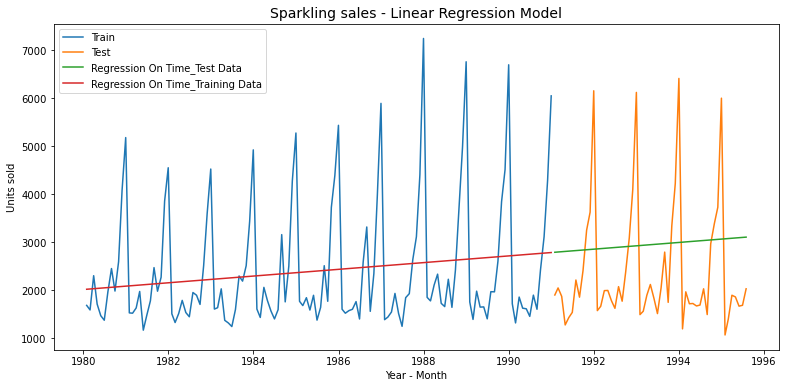

In [248]:
plt.figure(figsize=(13,6))
plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(LinearRegression_test['RegOnTime_spark'], label='Regression On Time_Test Data')
plt.plot(LinearRegression_train['RegOnTime_spark'], label='Regression On Time_Training Data')
plt.legend(loc='best')
plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Sparkling sales - Linear Regression Model', fontsize = 14);

### Rose

In [74]:
lr2 = LinearRegression().fit(LinearRegression_train[['time']],LinearRegression_train['Rose'].values)

In [75]:
LinearRegression_train['RegOnTime_rose']        = lr2.predict(LinearRegression_train[['time']])
LinearRegression_test['RegOnTime_rose']         = lr2.predict(LinearRegression_test[['time']])

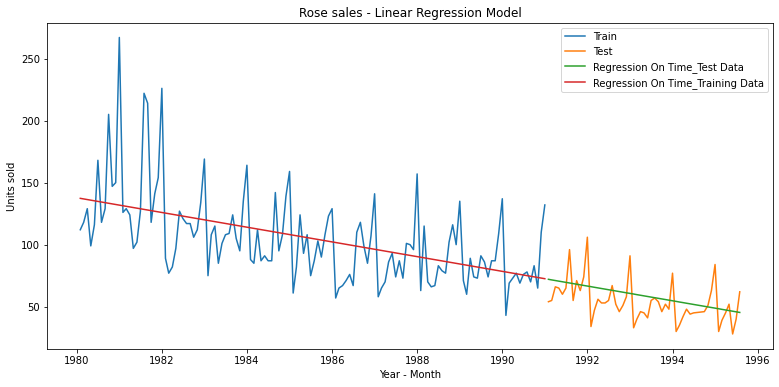

In [247]:
plt.figure(figsize=(13,6))
plt.plot( train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(LinearRegression_test['RegOnTime_rose'], label='Regression On Time_Test Data')
plt.plot(LinearRegression_train['RegOnTime_rose'], label='Regression On Time_Training Data')
plt.legend(loc='best')
plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Rose sales - Linear Regression Model');

## Model evaluation

In [78]:
from sklearn import metrics
def MAPE(y, yhat): 
    y, yhat = np.array(y), np.array(yhat)
    try:
        mape =  round(np.sum(np.abs(yhat - y)) / np.sum(y) * 100,2)
    except:
        print("Observed values are empty")
        mape = np.nan
    return mape

In [82]:
## Sparkling Training Data - RMSE and MAPE

rmse_spark_model1_train = metrics.mean_squared_error(train['Sparkling'],LinearRegression_train['RegOnTime_spark'],squared=False)
mape_spark_model1_train = MAPE(train['Sparkling'],LinearRegression_train['RegOnTime_spark'])
print("RegressionTime forecast on the Sparkling Training Data:  RMSE is %f and MAPE is %f" %(rmse_spark_model1_train, mape_spark_model1_train))

RegressionTime forecast on the Sparkling Training Data:  RMSE is 1279.322346 and MAPE is 40.050000


In [83]:
## Sparkling Testing Data - RMSE and MAPE

rmse_spark_model1_test = metrics.mean_squared_error(test['Sparkling'],LinearRegression_test['RegOnTime_spark'],squared=False)
mape_spark_model1_test = MAPE(test['Sparkling'],LinearRegression_test['RegOnTime_spark'])
print("Regression Time forecast on the Sparkling Testing Data:  RMSE is %f and MAPE is %f" %(rmse_spark_model1_test, mape_spark_model1_test))

Regression Time forecast on the Sparkling Testing Data:  RMSE is 1389.135175 and MAPE is 50.150000


In [84]:
rmse_rose_model1_train = metrics.mean_squared_error(train['Rose'],LinearRegression_train['RegOnTime_rose'],squared=False)
mape_rose_model1_train = MAPE(train['Rose'],LinearRegression_train['RegOnTime_rose'])
print("Regression Time forecast on the Rose Training Data:  RMSE is %f and MAPE is %f" %(rmse_rose_model1_train, mape_rose_model1_train))

Regression Time forecast on the Rose Training Data:  RMSE is 30.718135 and MAPE is 21.220000


In [85]:
## Rose testing Data - RMSE and MAPE

rmse_rose_model1_test = metrics.mean_squared_error(test['Rose'],LinearRegression_test['RegOnTime_rose'],squared=False)
mape_rose_model1_test = MAPE(test['Rose'],LinearRegression_test['RegOnTime_rose'])
print("Regression Time forecast on the Rose testing Data:  RMSE is %f and MAPE is %f" %(rmse_rose_model1_test, mape_rose_model1_test))

Regression Time forecast on the Rose testing Data:  RMSE is 15.268885 and MAPE is 22.820000


In [262]:
spark_resultsDf2 = pd.DataFrame({'Test RMSE': [rmse_spark_model1_test],'Test MAPE': [mape_spark_model1_test]},index=['RegressionOnTime'])
spark_resultsDf2

,Test RMSE,Test MAPE
RegressionOnTime,1389.135175,50.15


In [263]:
rose_resultsDf2 = pd.DataFrame({'Test RMSE': [rmse_rose_model1_test],'Test MAPE': [mape_rose_model1_test]},index=['RegressionOnTime'])
rose_resultsDf2

,Test RMSE,Test MAPE
RegressionOnTime,15.268885,22.82


## Model2 : Naive Forecast

In [86]:
NaiveModel_train = train.copy()`
NaiveModel_test = test.copy()

In [89]:
NaiveModel_test['spark_naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]

Text(0.5, 1.0, 'Sparkling - Naive Forecast')

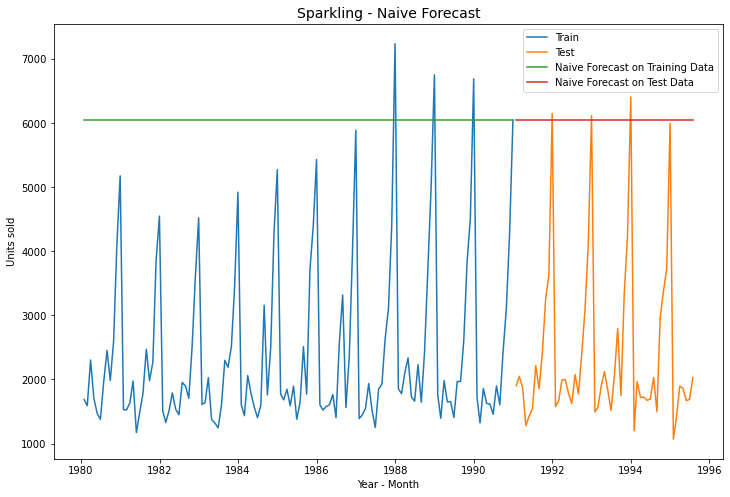

In [249]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(NaiveModel_train['spark_naive'], label='Naive Forecast on Training Data')
plt.plot(NaiveModel_test['spark_naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title("Sparkling - Naive Forecast", fontsize = 14)

## Rose

In [92]:
NaiveModel_train['rose_naive'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-1]
NaiveModel_train['rose_naive'].head()

YearMonth
1980-01-31    132.0
1980-02-29    132.0
1980-03-31    132.0
1980-04-30    132.0
1980-05-31    132.0
Name: rose_naive, dtype: float64

In [93]:
NaiveModel_test['rose_naive'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-1]
NaiveModel_test['rose_naive'].head()

YearMonth
1991-01-31    132.0
1991-02-28    132.0
1991-03-31    132.0
1991-04-30    132.0
1991-05-31    132.0
Name: rose_naive, dtype: float64

Text(0.5, 1.0, 'Rose - Naive Forecast')

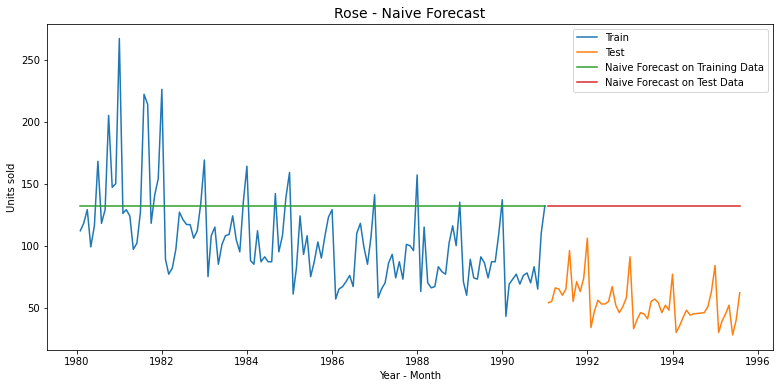

In [251]:
plt.figure(figsize=(13,6))
plt.plot(NaiveModel_train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(NaiveModel_train['rose_naive'], label='Naive Forecast on Training Data')
plt.plot(NaiveModel_test['rose_naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title("Rose - Naive Forecast", fontsize = 14)

## Model evaluation

In [95]:
## Sparkling Training Data - RMSE and MAPE

rmse_spark_model2_train = metrics.mean_squared_error(train['Sparkling'],NaiveModel_train['spark_naive'],squared=False)
mape_spark_model2_train = MAPE(train['Sparkling'],NaiveModel_train['spark_naive'])
print("For Naive forecast on the Sparkling Training Data:  RMSE is %f and MAPE is %f" %(rmse_spark_model2_train, mape_spark_model2_train))

For Naive forecast on the Sparkling Training Data:  RMSE is 3867.700802 and MAPE is 153.170000


In [252]:
## Sparkling Testing Data - RMSE and MAPE

rmse_spark_model2_test = metrics.mean_squared_error(test['Sparkling'],NaiveModel_test['spark_naive'],squared=False)
mape_spark_model2_test = MAPE(test['Sparkling'],NaiveModel_test['spark_naive'])
print("For Naive forecast on the Sparkling Testing Data:  RMSE is %f and MAPE is %f" %(rmse_spark_model2_test, mape_spark_model2_test))

For Naive forecast on the Sparkling Testing Data:  RMSE is 3864.279352 and MAPE is 152.870000


In [254]:
## Rose Training Data - RMSE and MAPE

rmse_rose_model2_train = metrics.mean_squared_error(train['Rose'],NaiveModel_train['rose_naive'],squared=False)
mape_rose_model2_train = MAPE(train['Rose'],NaiveModel_train['rose_naive'])
print("For Naive forecast on the Rose Training Data:  RMSE is %f and MAPE is %f" %(rmse_rose_model2_train, mape_rose_model2_train))

For Naive forecast on the Rose Training Data:  RMSE is 45.063760 and MAPE is 36.380000


In [255]:
## Rose Testing Data - RMSE and MAPE

rmse_rose_model2_test = metrics.mean_squared_error(test['Rose'],NaiveModel_test['rose_naive'],squared=False)
mape_rose_model2_test = MAPE(test['Rose'],NaiveModel_test['rose_naive'])
print("For Naive forecast on the Rose Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_rose_model2_test, mape_rose_model2_test))

For Naive forecast on the Rose Testing Data:  RMSE is 79.719 and MAPE is 145.10


In [264]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_spark_model2_test],'Test MAPE': [mape_spark_model2_test]},index=['NaiveModel'])

spark_resultsDf2 = pd.concat([spark_resultsDf2, resultsDf_2])
spark_resultsDf2

,Test RMSE,Test MAPE
RegressionOnTime,1389.135175,50.15
NaiveModel,3864.279352,152.87


In [265]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_rose_model2_test],'Test MAPE': [mape_rose_model2_test]},index=['NaiveModel'])

rose_resultsDf2 = pd.concat([rose_resultsDf2, resultsDf_2])
rose_resultsDf2

,Test RMSE,Test MAPE
RegressionOnTime,15.268885,22.82
NaiveModel,79.718559,145.10


## Simple Average
### Sparkling

In [99]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [100]:
SimpleAverage_train['spark_mean_forecast'] = train['Sparkling'].mean()


In [101]:
SimpleAverage_test['spark_mean_forecast'] = train['Sparkling'].mean()

Text(0.5, 1.0, 'Sparkling - SimpleAverage Forecast')

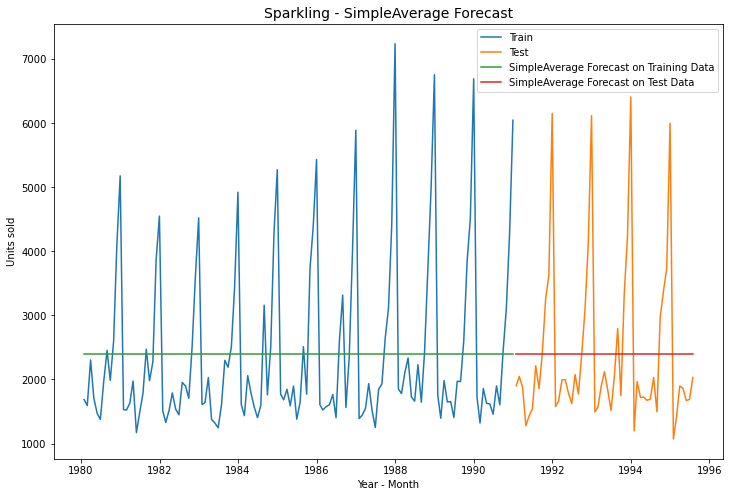

In [266]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(SimpleAverage_train['spark_mean_forecast'], label='SimpleAverage Forecast on Training Data')
plt.plot(SimpleAverage_test['spark_mean_forecast'], label='SimpleAverage Forecast on Test Data')
plt.legend(loc='best')
plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title("Sparkling - SimpleAverage Forecast", fontsize=14)

### Rose


In [104]:
SimpleAverage_train['rose_mean_forecast'] = train['Rose'].mean()
SimpleAverage_test['rose_mean_forecast'] = train['Rose'].mean()

Text(0.5, 1.0, 'Rose - SimpleAverage Forecast')

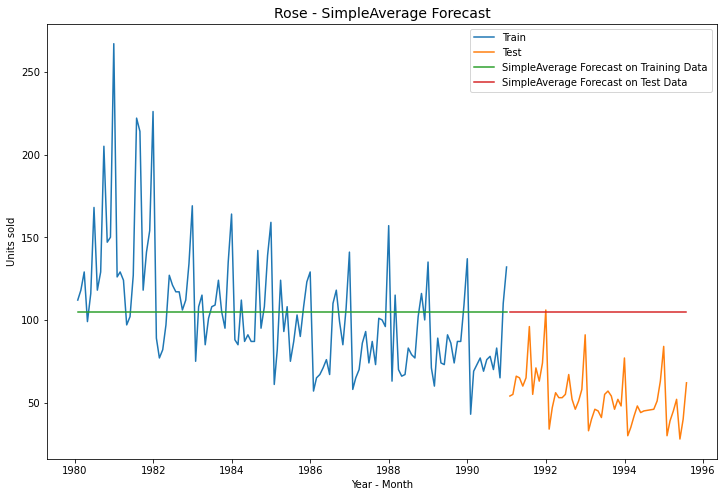

In [267]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(SimpleAverage_train['rose_mean_forecast'], label='SimpleAverage Forecast on Training Data')
plt.plot(SimpleAverage_test['rose_mean_forecast'], label='SimpleAverage Forecast on Test Data')
plt.legend(loc='best')
plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title("Rose - SimpleAverage Forecast", fontsize=14)

### Model evalutation


In [107]:
# spark RMSE and MAPE
rmse_spark_model3_train = metrics.mean_squared_error(train['Sparkling'],SimpleAverage_train['spark_mean_forecast'],squared=False)
mape_spark_model3_train = MAPE(train['Sparkling'],SimpleAverage_train['spark_mean_forecast'])
print("For Simple Average forecast on the Sparkling Training Data:  RMSE is %f and MAPE is %f" %(rmse_spark_model3_train, mape_spark_model3_train))

For Simple Average forecast on the Sparkling Training Data:  RMSE is 1298.483628 and MAPE is 40.360000


In [108]:
## Sparkling Testing Data - RMSE and MAPE

rmse_spark_model3_test = metrics.mean_squared_error(test['Sparkling'],SimpleAverage_test['spark_mean_forecast'],squared=False)
mape_spark_model3_test = MAPE(test['Sparkling'],SimpleAverage_test['spark_mean_forecast'])
print("For Simple Average forecast on the Sparkling Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_spark_model3_test, mape_spark_model3_test))

For Simple Average forecast on the Sparkling Testing Data:  RMSE is 1275.082 and MAPE is 38.90


In [109]:
## Rose Training Data - RMSE and MAPE

rmse_rose_model3_train = metrics.mean_squared_error(train['Rose'],SimpleAverage_train['rose_mean_forecast'],squared=False)
mape_rose_model3_train = MAPE(train['Rose'],SimpleAverage_train['rose_mean_forecast'])
print("For Simple Average forecast on the Rose Training Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_rose_model3_train, mape_rose_model3_train))

For Simple Average forecast on the Rose Training Data:  RMSE is 36.034 and MAPE is 25.39


In [269]:
## Rose Testing Data - RMSE and MAPE

rmse_rose_model3_test = metrics.mean_squared_error(test['Rose'],SimpleAverage_test['rose_mean_forecast'],squared=False)
mape_rose_model3_test = MAPE(test['Rose'],SimpleAverage_test['rose_mean_forecast'])
print("For Simple Average forecast on the Rose Testing Data:  RMSE is %f and MAPE is %f" %(rmse_rose_model3_test, mape_rose_model3_test))

For Simple Average forecast on the Rose Testing Data:  RMSE is 53.460350 and MAPE is 94.930000


In [268]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_spark_model3_test],'Test MAPE': [mape_spark_model3_test]},index=['SimpleAverage'])

spark_resultsDf2 = pd.concat([spark_resultsDf2, resultsDf_2])
spark_resultsDf2

,Test RMSE,Test MAPE
RegressionOnTime,1389.135175,50.15
NaiveModel,3864.279352,152.87
SimpleAverage,1275.081804,38.90


In [270]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_rose_model3_test],'Test MAPE': [mape_rose_model3_test]},index=['SimpleAverage'])

rose_resultsDf2 = pd.concat([rose_resultsDf2, resultsDf_2])
rose_resultsDf2

,Test RMSE,Test MAPE
RegressionOnTime,15.268885,22.82
NaiveModel,79.718559,145.10
SimpleAverage,53.460350,94.93


## Model 4- Moving avereage

In [111]:
MovingAverage = df.copy()
MovingAverage.head()

,Sparkling,Rose
YearMonth,,
1980-01-31,1686,112.0
1980-02-29,1591,118.0
1980-03-31,2304,129.0
1980-04-30,1712,99.0
1980-05-31,1471,116.0


In [113]:
MovingAverage['Spark_Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Spark_Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Spark_Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Spark_Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()
MovingAverage['Rose_Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
MovingAverage['Rose_Trailing_4'] = MovingAverage['Rose'].rolling(4).mean()
MovingAverage['Rose_Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Rose_Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()

MovingAverage.head()

,Sparkling,Rose,Spark_Trailing_2,Spark_Trailing_4,Spark_Trailing_6,Spark_Trailing_9,Rose_Trailing_2,Rose_Trailing_4,Rose_Trailing_6,Rose_Trailing_9
YearMonth,,,,,,,,,,
1980-01-31,1686,112.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-02-29,1591,118.0,1638.5,NaN,NaN,NaN,115.0,NaN,NaN,NaN
1980-03-31,2304,129.0,1947.5,NaN,NaN,NaN,123.5,NaN,NaN,NaN
1980-04-30,1712,99.0,2008.0,1823.25,NaN,NaN,114.0,114.50,NaN,NaN
1980-05-31,1471,116.0,1591.5,1769.50,NaN,NaN,107.5,115.50,NaN,NaN
1980-06-30,1377,168.0,1424.0,1716.00,1690.166667,NaN,142.0,128.00,123.666667,NaN
1980-07-31,1966,118.0,1671.5,1631.50,1736.833333,NaN,143.0,125.25,124.666667,NaN
1980-08-31,2453,129.0,2209.5,1816.75,1880.500000,NaN,123.5,132.75,126.500000,NaN
1980-09-30,1984,205.0,2218.5,1945.00,1827.166667,1838.222222,167.0,155.00,139.166667,132.666667


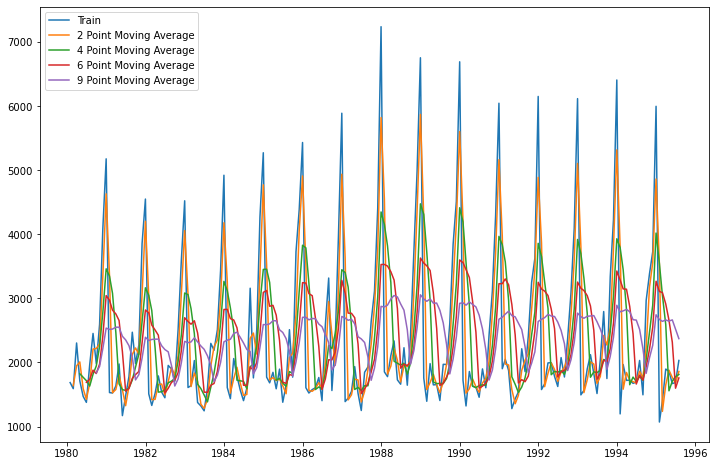

In [271]:
plt.figure(figsize=(12,8))
plt.plot(MovingAverage['Sparkling'], label='Train')
plt.plot(MovingAverage['Spark_Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Spark_Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Spark_Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Spark_Trailing_9'],label = '9 Point Moving Average')
plt.legend(loc = 'best')

In [116]:
#Creating train and test set 
trailing_MovingAverage_train = MovingAverage[MovingAverage.index.year < 1991]
trailing_MovingAverage_test = MovingAverage[MovingAverage.index.year >= 1991]

Text(0.5, 1.0, 'Sparkling - Trailing Moving Average Forecast')

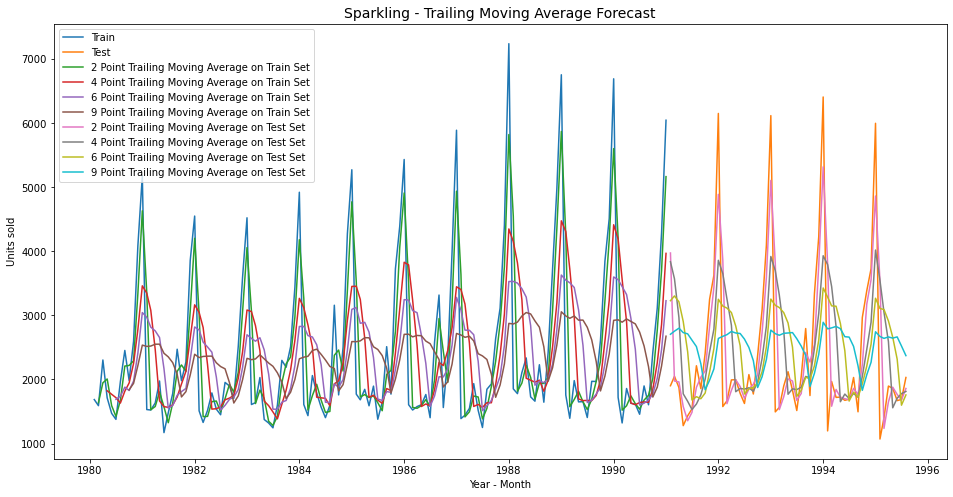

In [122]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test')

plt.plot(trailing_MovingAverage_train['Spark_Trailing_2'], label='2 Point Trailing Moving Average on Train Set')
plt.plot(trailing_MovingAverage_train['Spark_Trailing_4'], label='4 Point Trailing Moving Average on Train Set')
plt.plot(trailing_MovingAverage_train['Spark_Trailing_6'],label = '6 Point Trailing Moving Average on Train Set')
plt.plot(trailing_MovingAverage_train['Spark_Trailing_9'],label = '9 Point Trailing Moving Average on Train Set')

plt.plot(trailing_MovingAverage_test['Spark_Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Spark_Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Spark_Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Spark_Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')

plt.xlabel('Year - Month')
plt.ylabel('Units sold')

plt.title("Sparkling - Trailing Moving Average Forecast", fontsize=14)

### Rose

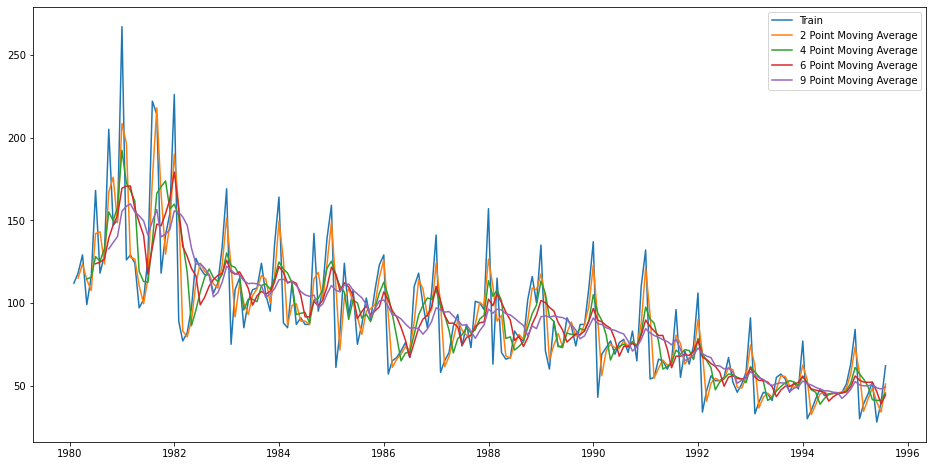

In [273]:
plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Rose'], label='Train')
plt.plot(MovingAverage['Rose_Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Rose_Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Rose_Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Rose_Trailing_9'],label = '9 Point Moving Average')
plt.legend(loc = 'best')

Text(0.5, 1.0, 'Rose - Trailing Moving Average Forecast')

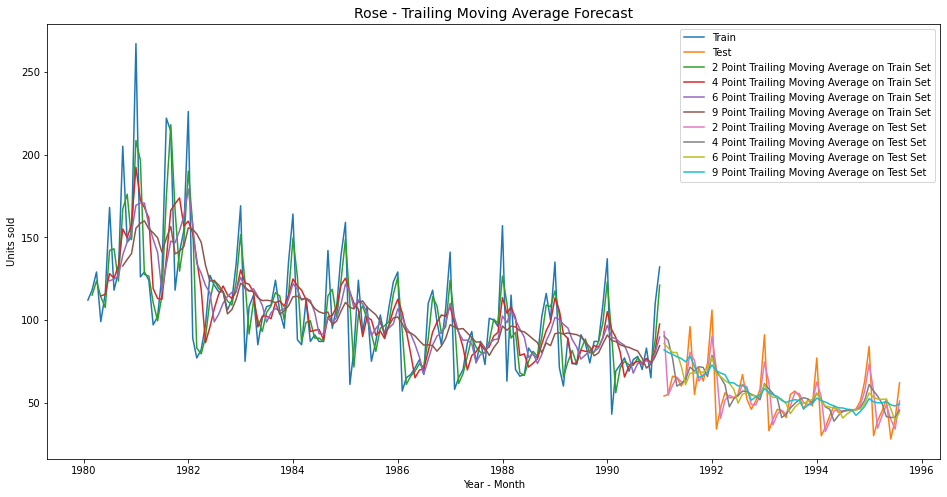

In [124]:
plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')

plt.plot(trailing_MovingAverage_train['Rose_Trailing_2'], label='2 Point Trailing Moving Average on Train Set')
plt.plot(trailing_MovingAverage_train['Rose_Trailing_4'], label='4 Point Trailing Moving Average on Train Set')
plt.plot(trailing_MovingAverage_train['Rose_Trailing_6'],label = '6 Point Trailing Moving Average on Train Set')
plt.plot(trailing_MovingAverage_train['Rose_Trailing_9'],label = '9 Point Trailing Moving Average on Train Set')

plt.plot(trailing_MovingAverage_test['Rose_Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Rose_Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Rose_Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Rose_Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.xlabel('Year - Month')
plt.ylabel('Units sold')

plt.title("Rose - Trailing Moving Average Forecast", fontsize=14)

## Model evaluation

In [274]:
## Test Data - rmse_spark and mape_spark --> 2 point Spark_Trailing MA

rmse_spark_model4_test_2 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Spark_Trailing_2'],squared=False)
mape_spark_model4_test_2 = MAPE(test['Sparkling'],trailing_MovingAverage_test['Spark_Trailing_2'])
print("For 2 point Moving Average Model forecast on the Training Data,  rmse_spark is %f mape_spark is %f" %(rmse_spark_model4_test_2, mape_spark_model4_test_2))

## Test Data - rmse_spark and mape_spark --> 4 point Spark_Trailing MA

rmse_spark_model4_test_4 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Spark_Trailing_4'],squared=False)
mape_spark_model4_test_4 = MAPE(test['Sparkling'],trailing_MovingAverage_test['Spark_Trailing_4'])
print("For 4 point Moving Average Model forecast on the Training Data,  rmse_spark is %f mape_spark is %f" %(rmse_spark_model4_test_4, mape_spark_model4_test_4))

## Test Data - rmse_spark and mape_spark --> 6 point Spark_Trailing MA

rmse_spark_model4_test_6 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Spark_Trailing_6'],squared=False)
mape_spark_model4_test_6 = MAPE(test['Sparkling'],trailing_MovingAverage_test['Spark_Trailing_6'])
print("For 6 point Moving Average Model forecast on the Training Data,  rmse_spark is %f mape_spark is %f" %(rmse_spark_model4_test_6, mape_spark_model4_test_6))

## Test Data - rmse_spark and mape_spark --> 9 point Spark_Trailing MA

rmse_spark_model4_test_9 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Spark_Trailing_9'],squared=False)
mape_spark_model4_test_9 = MAPE(test['Sparkling'],trailing_MovingAverage_test['Spark_Trailing_9'])
print("For 9 point Moving Average Model forecast on the Training Data,  rmse_spark is %f mape_spark is %f" %(rmse_spark_model4_test_9, mape_spark_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  rmse_spark is 813.400684 mape_spark is 19.700000
For 4 point Moving Average Model forecast on the Training Data,  rmse_spark is 1156.589694 mape_spark is 35.960000
For 6 point Moving Average Model forecast on the Training Data,  rmse_spark is 1283.927428 mape_spark is 43.860000
For 9 point Moving Average Model forecast on the Training Data,  rmse_spark is 1346.278315 mape_spark is 46.860000


In [126]:
## Test Data - rmse_rose and mape_rose --> 2 point rose_Trailing MA

rmse_rose_model4_test_2 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Rose_Trailing_2'],squared=False)
mape_rose_model4_test_2 = MAPE(test['Rose'],trailing_MovingAverage_test['Rose_Trailing_2'])
print("For 2 point Moving Average Model forecast on the Training Data,  rmse_rose is %3.3f mape_rose is %3.2f" %(rmse_rose_model4_test_2, mape_rose_model4_test_2))

## Test Data - rmse_rose and mape_rose --> 4 point rose_Trailing MA

rmse_rose_model4_test_4 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Rose_Trailing_4'],squared=False)
mape_rose_model4_test_4 = MAPE(test['Rose'],trailing_MovingAverage_test['Rose_Trailing_4'])
print("For 4 point Moving Average Model forecast on the Training Data,  rmse_rose is %3.3f mape_rose is %3.2f" %(rmse_rose_model4_test_4, mape_rose_model4_test_4))

## Test Data - rmse_rose and mape_rose --> 6 point rose_Trailing MA

rmse_rose_model4_test_6 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Rose_Trailing_6'],squared=False)
mape_rose_model4_test_6 = MAPE(test['Rose'],trailing_MovingAverage_test['Rose_Trailing_6'])
print("For 6 point Moving Average Model forecast on the Training Data,  rmse_rose is %3.3f mape_rose is %3.2f" %(rmse_rose_model4_test_6, mape_rose_model4_test_6))

## Test Data - rmse_rose and mape_rose --> 9 point rose_Trailing MA

rmse_rose_model4_test_9 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Rose_Trailing_9'],squared=False)
mape_rose_model4_test_9 = MAPE(test['Rose'],trailing_MovingAverage_test['Rose_Trailing_9'])
print("For 9 point Moving Average Model forecast on the Training Data,  rmse_rose is %3.3f mape_rose is %3.2f" %(rmse_rose_model4_test_9, mape_rose_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  rmse_rose is 11.529 mape_rose is 13.54
For 4 point Moving Average Model forecast on the Training Data,  rmse_rose is 14.451 mape_rose is 19.49
For 6 point Moving Average Model forecast on the Training Data,  rmse_rose is 14.566 mape_rose is 20.82
For 9 point Moving Average Model forecast on the Training Data,  rmse_rose is 14.728 mape_rose is 21.01


In [275]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_spark_model4_test_2,rmse_spark_model4_test_4
                                          ,rmse_spark_model4_test_6,rmse_spark_model4_test_9]
                            ,'Test MAPE': [mape_spark_model4_test_2,mape_spark_model4_test_4,
                                           mape_spark_model4_test_6,mape_spark_model4_test_9]}
                           ,index=['2 point TMA','4 point TMA'
                                   ,'6 point TMA','9 point TMA'])

spark_resultsDf2 = pd.concat([spark_resultsDf2, resultsDf_4])
spark_resultsDf2

,Test RMSE,Test MAPE
RegressionOnTime,1389.135175,50.15
NaiveModel,3864.279352,152.87
SimpleAverage,1275.081804,38.90
2 point TMA,813.400684,19.70
4 point TMA,1156.589694,35.96
6 point TMA,1283.927428,43.86
9 point TMA,1346.278315,46.86


In [276]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_rose_model4_test_2,rmse_rose_model4_test_4
                                          ,rmse_rose_model4_test_6,rmse_rose_model4_test_9]
                            ,'Test MAPE': [mape_rose_model4_test_2,mape_rose_model4_test_4,
                                           mape_rose_model4_test_6,mape_rose_model4_test_9]}
                           ,index=['2 point TMA','4 point TMA'
                                   ,'6 point TMA','9 point TMA'])

rose_resultsDf2 = pd.concat([rose_resultsDf2, resultsDf_4])
rose_resultsDf2

,Test RMSE,Test MAPE
RegressionOnTime,15.268885,22.82
NaiveModel,79.718559,145.10
SimpleAverage,53.460350,94.93
2 point TMA,11.529278,13.54
4 point TMA,14.451364,19.49
6 point TMA,14.566269,20.82
9 point TMA,14.727594,21.01


## ARIMA MODELS


In [127]:
# TEST FOR STATIONARY
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries, color):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color=color,label='Observed')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

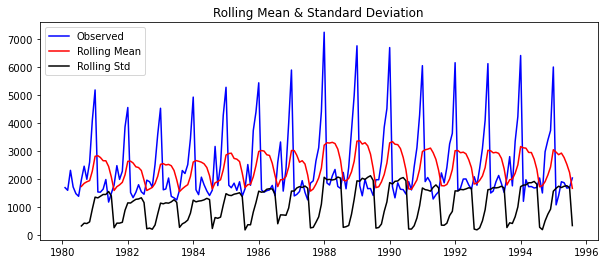

Results of Dickey-Fuller Test:
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [129]:
plt.figure(figsize=(10,4))
test_stationarity(df['Sparkling'],'BLUE')

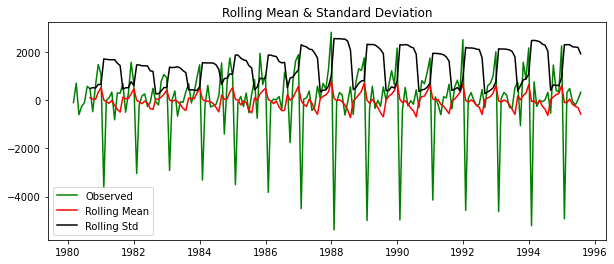

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [131]:
plt.figure(figsize=(10,4))
test_stationarity(df['Sparkling'].diff().dropna(),'GREEN')

### Rose

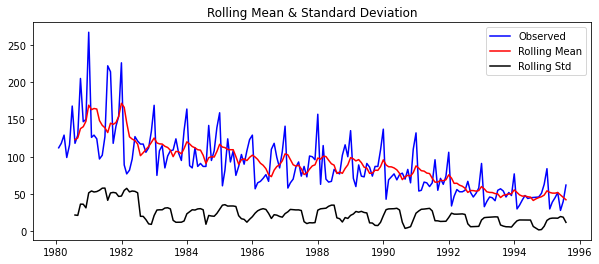

Results of Dickey-Fuller Test:
Test Statistic                  -1.876719
p-value                          0.343091
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [133]:
plt.figure(figsize=(10,4))
test_stationarity(df['Rose'], 'blue')

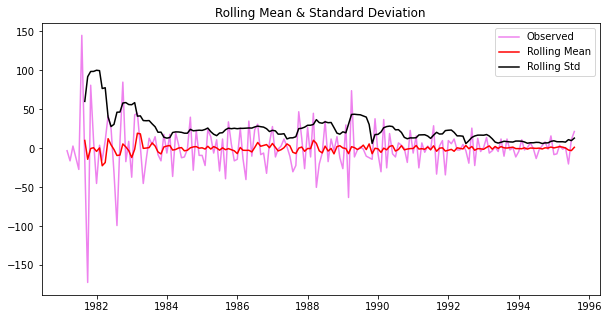

Results of Dickey-Fuller Test:
Test Statistic                  -4.605732
p-value                          0.000126
#Lags Used                      11.000000
Number of Observations Used    162.000000
Critical Value (1%)             -3.471374
Critical Value (5%)             -2.879552
Critical Value (10%)            -2.576373
dtype: float64 



In [134]:
plt.figure(figsize=(10,5))
test_stationarity((df['Rose'].diff(12).dropna()).diff().dropna(), 'violet')

## Plot the Autocorrelation and the Partial Autocorrelation function plots on the whole data.

In [135]:

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

### Sparkling
ACF plot


<Figure size 720x360 with 0 Axes>

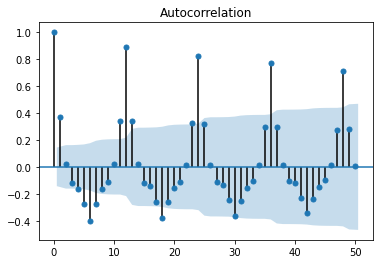

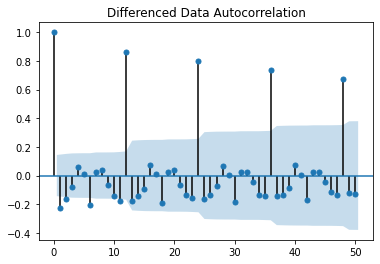

In [136]:
plt.figure(figsize=(10,5))
plot_acf(df['Sparkling'],lags=50)
plot_acf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show();

PACF plots

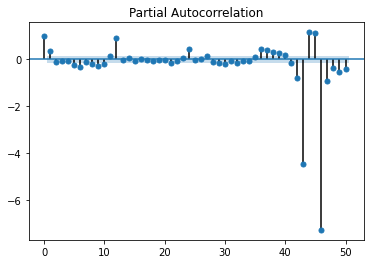

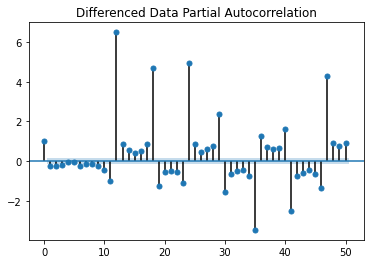

In [138]:

plot_pacf(df['Sparkling'],lags=50)
plot_pacf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

### Rose

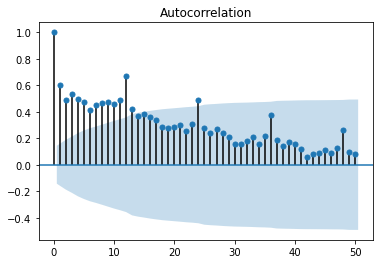

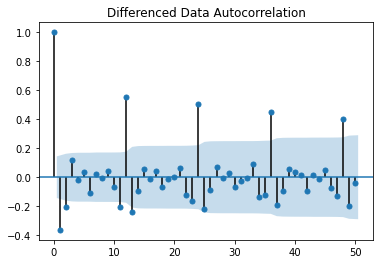

In [139]:
plot_acf(df['Rose'],lags=50)
plot_acf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show();

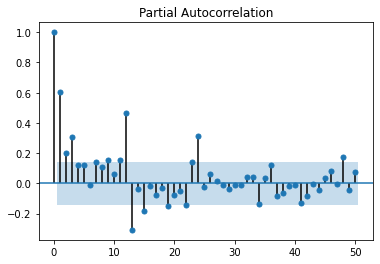

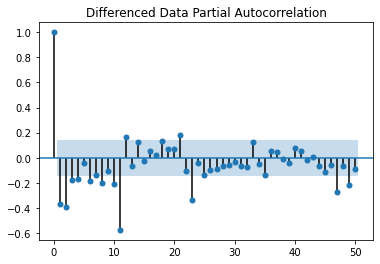

In [140]:
plot_pacf(df['Rose'],lags=50)
plot_pacf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

## Model 5 SARIMA

In [141]:
SARIMA_train = train.copy()
SARIMA_test = test.copy()

In [142]:
# build an automated version of SARIMA model for finding the best parmeters
import itertools
p = q = range(0,4)
d= range(1,2)
D = range(1,2)
#p = q = range(0,1)
#d= range(0,1)
#D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 1, 1, 12)
Model: (0, 1, 2)(0, 1, 2, 12)
Model: (0, 1, 3)(0, 1, 3, 12)
Model: (1, 1, 0)(1, 1, 0, 12)
Model: (1, 1, 1)(1, 1, 1, 12)
Model: (1, 1, 2)(1, 1, 2, 12)
Model: (1, 1, 3)(1, 1, 3, 12)
Model: (2, 1, 0)(2, 1, 0, 12)
Model: (2, 1, 1)(2, 1, 1, 12)
Model: (2, 1, 2)(2, 1, 2, 12)
Model: (2, 1, 3)(2, 1, 3, 12)
Model: (3, 1, 0)(3, 1, 0, 12)
Model: (3, 1, 1)(3, 1, 1, 12)
Model: (3, 1, 2)(3, 1, 2, 12)
Model: (3, 1, 3)(3, 1, 3, 12)


In [277]:
SARIMA_AIC_spark = pd.DataFrame(columns=['param','seasonal', 'AIC'])
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model_spark = sm.tsa.statespace.SARIMAX(SARIMA_train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA_spark = SARIMA_model_spark.fit(maxiter=1000)
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA_spark.aic))
        SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 1, 0, 12)7 - AIC:1822.982485206384
SARIMA(0, 1, 0)x(0, 1, 1, 12)7 - AIC:1626.8626334545004
SARIMA(0, 1, 0)x(0, 1, 2, 12)7 - AIC:1452.6773574277793
SARIMA(0, 1, 0)x(0, 1, 3, 12)7 - AIC:6104.647685388771
SARIMA(0, 1, 0)x(1, 1, 0, 12)7 - AIC:1646.3778167661442
SARIMA(0, 1, 0)x(1, 1, 1, 12)7 - AIC:1628.3243908893419
SARIMA(0, 1, 0)x(1, 1, 2, 12)7 - AIC:1454.5289621898435
SARIMA(0, 1, 0)x(1, 1, 3, 12)7 - AIC:6122.822239075646
SARIMA(0, 1, 0)x(2, 1, 0, 12)7 - AIC:1466.6211360755017
SARIMA(0, 1, 0)x(2, 1, 1, 12)7 - AIC:1468.5000981881103
SARIMA(0, 1, 0)x(2, 1, 2, 12)7 - AIC:1456.0729761858415
SARIMA(0, 1, 0)x(2, 1, 3, 12)7 - AIC:2092.4142257977
SARIMA(0, 1, 0)x(3, 1, 0, 12)7 - AIC:1289.239819743992
SARIMA(0, 1, 0)x(3, 1, 1, 12)7 - AIC:1291.2448877994063
SARIMA(0, 1, 0)x(3, 1, 2, 12)7 - AIC:1289.1183220608052
SARIMA(0, 1, 0)x(3, 1, 3, 12)7 - AIC:6002.743002180379
SARIMA(0, 1, 1)x(0, 1, 0, 12)7 - AIC:1760.6565719765836
SARIMA(0, 1, 1)x(0, 1, 1, 12)7 - AIC:1569.663923422531
S

SARIMA(2, 1, 1)x(2, 1, 0, 12)7 - AIC:1400.9854074352843
SARIMA(2, 1, 1)x(2, 1, 1, 12)7 - AIC:1401.9924736944947
SARIMA(2, 1, 1)x(2, 1, 2, 12)7 - AIC:1403.818345196833
SARIMA(2, 1, 1)x(2, 1, 3, 12)7 - AIC:6307.618652220209
SARIMA(2, 1, 1)x(3, 1, 0, 12)7 - AIC:1228.3132766084827
SARIMA(2, 1, 1)x(3, 1, 1, 12)7 - AIC:1230.1483341236913
SARIMA(2, 1, 1)x(3, 1, 2, 12)7 - AIC:1230.759783136972
SARIMA(2, 1, 1)x(3, 1, 3, 12)7 - AIC:nan
SARIMA(2, 1, 2)x(0, 1, 0, 12)7 - AIC:1742.293070553176
SARIMA(2, 1, 2)x(0, 1, 1, 12)7 - AIC:1556.9467334524647
SARIMA(2, 1, 2)x(0, 1, 2, 12)7 - AIC:1384.3176180788305
SARIMA(2, 1, 2)x(0, 1, 3, 12)7 - AIC:nan
SARIMA(2, 1, 2)x(1, 1, 0, 12)7 - AIC:1573.1168644409909
SARIMA(2, 1, 2)x(1, 1, 1, 12)7 - AIC:1558.120088686262
SARIMA(2, 1, 2)x(1, 1, 2, 12)7 - AIC:1386.0972412472586
SARIMA(2, 1, 2)x(1, 1, 3, 12)7 - AIC:6458.942027746689
SARIMA(2, 1, 2)x(2, 1, 0, 12)7 - AIC:1399.7756339973182
SARIMA(2, 1, 2)x(2, 1, 1, 12)7 - AIC:1401.183215865765
SARIMA(2, 1, 2)x(2, 1, 2, 12)

KeyboardInterrupt: 

In [278]:
SARIMA_AIC_spark.sort_values(by=['AIC']).head()

,param,seasonal,AIC
220,"(3, 1, 1)","(3, 1, 0, 12)",1215.898777
236,"(3, 1, 2)","(3, 1, 0, 12)",1216.859173
221,"(3, 1, 1)","(3, 1, 1, 12)",1217.713892
222,"(3, 1, 1)","(3, 1, 2, 12)",1218.416045
237,"(3, 1, 2)","(3, 1, 1, 12)",1218.991387


In [146]:
auto_SARIMA_spark = sm.tsa.statespace.SARIMAX(SARIMA_train['Sparkling'].values,
                                order=(3, 1, 3),
                                seasonal_order=(3, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_spark = auto_SARIMA_spark.fit(maxiter=1000)
print(results_auto_SARIMA_spark.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  132
Model:             SARIMAX(3, 1, 3)x(3, 1, [], 12)   Log Likelihood                -596.641
Date:                             Fri, 24 Sep 2021   AIC                           1213.283
Time:                                     22:44:17   BIC                           1237.103
Sample:                                          0   HQIC                          1222.833
                                             - 132                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6142      0.176     -9.170      0.000      -1.959      -1.269
ar.L2         -0.6125      

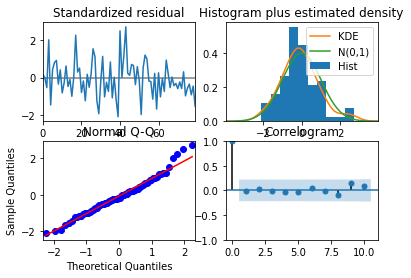

In [147]:
results_auto_SARIMA_spark.plot_diagnostics()
plt.show()

In [148]:
SARIMA_test.head()

,Sparkling,Rose
YearMonth,,
1991-01-31,1902,54.0
1991-02-28,2049,55.0
1991-03-31,1874,66.0
1991-04-30,1279,65.0
1991-05-31,1432,60.0


In [149]:
pred_dynamic = results_auto_SARIMA_spark.get_prediction(dynamic=True, full_results=True)

In [150]:
pred_dynamic_ci = pred_dynamic.conf_int()
predicted_auto_SARIMA_spark = results_auto_SARIMA_spark.get_forecast(steps=len(SARIMA_test['Sparkling']), alpha=0.05)

In [151]:
spark_forecasted = pred_dynamic.predicted_mean
SARIMA_test['spark_forecasted'] = predicted_auto_SARIMA_spark.predicted_mean
SARIMA_test.head()

,Sparkling,Rose,spark_forecasted
YearMonth,,,
1991-01-31,1902,54.0,1429.827245
1991-02-28,2049,55.0,1539.071712
1991-03-31,1874,66.0,1706.370219
1991-04-30,1279,65.0,1857.286162
1991-05-31,1432,60.0,1500.491553


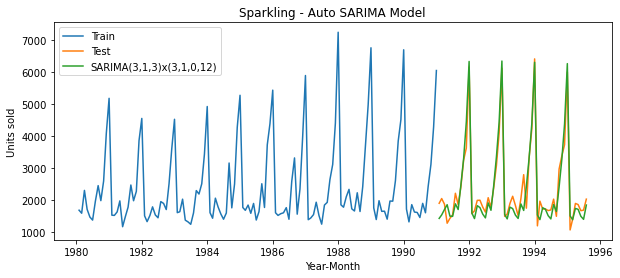

In [318]:

plt.figure(figsize=(10,4))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(SARIMA_test['spark_forecasted'], label='SARIMA(3,1,3)x(3,1,0,12)')
plt.xlabel('Year-Month')
plt.ylabel('Units sold')
plt.title('Sparkling - Auto SARIMA Model')
plt.legend(loc='best')

In [283]:
rmse_spark_model5_test = metrics.mean_squared_error(test['Sparkling'],SARIMA_test['spark_forecasted'],squared=False)
mape_spark_model5_test = MAPE(test['Sparkling'],SARIMA_test['spark_forecasted'])
print("For SARIMA forecast on the Sparkling Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_spark_model8_test, mape_spark_model8_test))

For SARIMA forecast on the Sparkling Testing Data:  RMSE is 324.198 and MAPE is 9.48


In [288]:
resultsDf_5_spark1 = pd.DataFrame({'Test RMSE': [rmse_spark_model5_test],'Test MAPE': [mape_spark_model5_test]},index=['Auto SARIMA(3,1,3)x(3,1,0,12)'])

spark_resultsDf2 = pd.concat([spark_resultsDf2, resultsDf_5_spark1])
spark_resultsDf2


,Test RMSE,Test MAPE
RegressionOnTime,1389.135175,50.15
NaiveModel,3864.279352,152.87
SimpleAverage,1275.081804,38.90
2 point TMA,813.400684,19.70
4 point TMA,1156.589694,35.96
6 point TMA,1283.927428,43.86
9 point TMA,1346.278315,46.86
"Auto SARIMA(3,1,3)x(3,1,0,12)",332.087579,10.37


### Build a version of the SARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots.

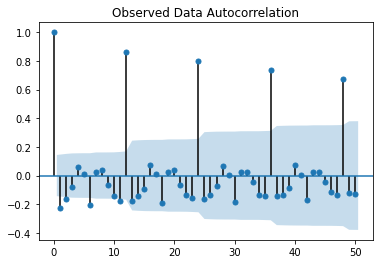

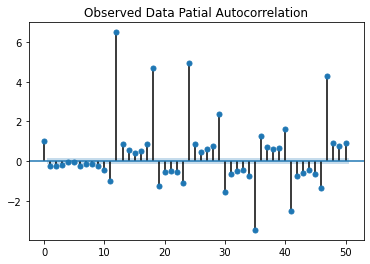

In [154]:
plot_acf(df['Sparkling'].diff().dropna(),lags=50,title='Observed Data Autocorrelation')
plot_pacf(df['Sparkling'].diff().dropna(),lags=50,title='Observed Data Patial Autocorrelation')
plt.show()

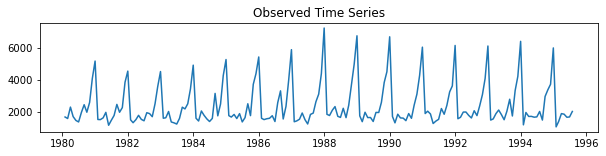

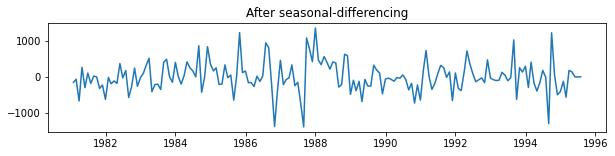

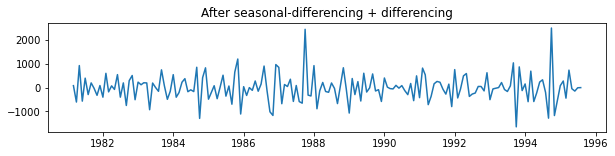

In [322]:
plt.figure(figsize=(10,2))
plt.plot(df['Sparkling'])
plt.title ('Observed Time Series');
plt.figure(figsize=(10,2))
plt.plot(df['Sparkling'].diff(12).dropna())
plt.title ('After seasonal-differencing');
#marginal trend is still seen
plt.figure(figsize=(10,2))
plt.plot((df['Sparkling'].diff(12).dropna()).diff().dropna())
plt.title ('After seasonal-differencing + differencing');

Now we see that there is almost no trend present in the data. Seasonality is only present in the data.
Let us go ahead and check the stationarity of the above series before fitting the SARIMA model.

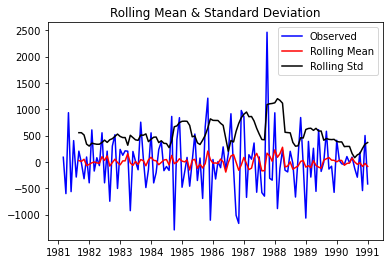

Results of Dickey-Fuller Test:
Test Statistic                  -3.342905
p-value                          0.013066
#Lags Used                      10.000000
Number of Observations Used    108.000000
Critical Value (1%)             -3.492401
Critical Value (5%)             -2.888697
Critical Value (10%)            -2.581255
dtype: float64 



In [324]:
test_stationarity((SARIMA_train['Sparkling'].diff(12).dropna()).diff().dropna(), 'blue')

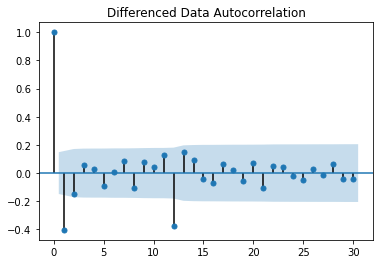

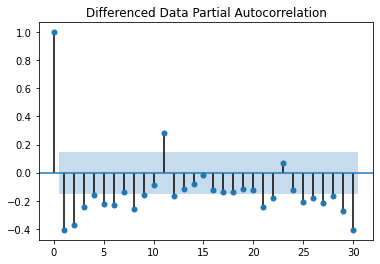

In [161]:
plot_acf((df['Sparkling'].diff(12).dropna()).diff().dropna(),lags=30, title='Differenced Data Autocorrelation')
plot_pacf((df['Sparkling'].diff(12).dropna()).diff().dropna(),lags=30, title='Differenced Data Partial Autocorrelation');

In [162]:
import statsmodels.api as sm

manual_SARIMA_spark = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(3, 1, 1),#(3, 1, 1),
                                seasonal_order= (1, 1, 2, 12),#(0, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_spark = manual_SARIMA_spark.fit(maxiter=1000)
print(results_manual_SARIMA_spark.summary())

                                        SARIMAX Results                                        
Dep. Variable:                                       y   No. Observations:                  132
Model:             SARIMAX(3, 1, 1)x(1, 1, [1, 2], 12)   Log Likelihood                -693.697
Date:                                 Fri, 24 Sep 2021   AIC                           1403.394
Time:                                         23:56:14   BIC                           1423.654
Sample:                                              0   HQIC                          1411.574
                                                 - 132                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2229      0.130      1.714      0.086      -0.032       0

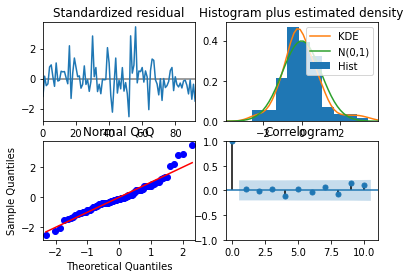

In [163]:
results_manual_SARIMA_spark.plot_diagnostics()
plt.show()

In [164]:
pred_dynamic = results_manual_SARIMA_spark.get_prediction(dynamic=True, full_results=True)

In [166]:
pred_dynamic_ci = pred_dynamic.conf_int()
predicted_manual_SARIMA_spark = results_manual_SARIMA_spark.get_forecast(steps=len(SARIMA_test['Sparkling']), alpha=0.5)

In [167]:
spark_manual_forecasted = pred_dynamic.predicted_mean
SARIMA_test['spark_manual_forecasted'] = predicted_manual_SARIMA_spark.predicted_mean
SARIMA_test.head()

,Sparkling,Rose,spark_forecasted,spark_manual_forecasted
YearMonth,,,,
1991-01-31,1902,54.0,1429.827245,1580.075023
1991-02-28,2049,55.0,1539.071712,1419.372679
1991-03-31,1874,66.0,1706.370219,1868.377355
1991-04-30,1279,65.0,1857.286162,1731.736049
1991-05-31,1432,60.0,1500.491553,1660.103610


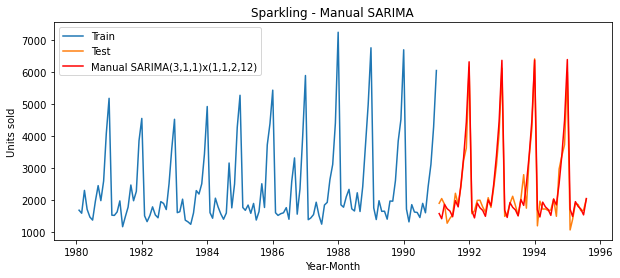

In [319]:

plt.figure(figsize=(10,4))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(SARIMA_test['spark_manual_forecasted'], color='red', label='Manual SARIMA(3,1,1)x(1,1,2,12)')
plt.ylabel('Units sold')
plt.xlabel('Year-Month')
plt.title('Sparkling - Manual SARIMA')
plt.legend(loc='best')

In [289]:
rmse_spark_model5_test = metrics.mean_squared_error(test['Sparkling'],SARIMA_test['spark_manual_forecasted'],squared=False)
mape_spark_model5_test = MAPE(test['Sparkling'],SARIMA_test['spark_manual_forecasted'])
print("For SARIMA forecast on the Sparkling Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_spark_model5_test, mape_spark_model5_test))

For SARIMA forecast on the Sparkling Testing Data:  RMSE is 324.198 and MAPE is 9.48


In [292]:
resultsDf_5_spark2 = pd.DataFrame({'Test RMSE': [rmse_spark_model5_test],'Test MAPE': [mape_spark_model5_test]},index=['Manual SARIMA(3,1,1)x(1,1,2,12)'])

spark_resultsDf2 = pd.concat([spark_resultsDf2, resultsDf_5_spark2])
spark_resultsDf2

,Test RMSE,Test MAPE
RegressionOnTime,1389.135175,50.15
NaiveModel,3864.279352,152.87
SimpleAverage,1275.081804,38.90
2 point TMA,813.400684,19.70
4 point TMA,1156.589694,35.96
6 point TMA,1283.927428,43.86
9 point TMA,1346.278315,46.86
"Auto SARIMA(3,1,3)x(3,1,0,12)",332.087579,10.37
"Manual SARIMA(3,1,1)x(1,1,2,12)",324.198328,9.48


## Model 5 - SARIMA on ROSE
### Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

### Original ROSE data

In [170]:
import itertools
p = q = range(0,4)
d = range(1,2)
D = range(1,2)


pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 1, 1, 12)
Model: (0, 1, 2)(0, 1, 2, 12)
Model: (0, 1, 3)(0, 1, 3, 12)
Model: (1, 1, 0)(1, 1, 0, 12)
Model: (1, 1, 1)(1, 1, 1, 12)
Model: (1, 1, 2)(1, 1, 2, 12)
Model: (1, 1, 3)(1, 1, 3, 12)
Model: (2, 1, 0)(2, 1, 0, 12)
Model: (2, 1, 1)(2, 1, 1, 12)
Model: (2, 1, 2)(2, 1, 2, 12)
Model: (2, 1, 3)(2, 1, 3, 12)
Model: (3, 1, 0)(3, 1, 0, 12)
Model: (3, 1, 1)(3, 1, 1, 12)
Model: (3, 1, 2)(3, 1, 2, 12)
Model: (3, 1, 3)(3, 1, 3, 12)


In [172]:
SARIMA_AIC_rose = pd.DataFrame(columns=['param','seasonal', 'AIC'])

In [174]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model_rose = sm.tsa.statespace.SARIMAX(SARIMA_train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA_rose = SARIMA_model_rose.fit(maxiter=1000)
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA_rose.aic))
        SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 1, 0, 12)7 - AIC:1171.2013438278946
SARIMA(0, 1, 0)x(0, 1, 1, 12)7 - AIC:965.5057301644265
SARIMA(0, 1, 0)x(0, 1, 2, 12)7 - AIC:845.8687014723129
SARIMA(0, 1, 0)x(0, 1, 3, 12)7 - AIC:nan
SARIMA(0, 1, 0)x(1, 1, 0, 12)7 - AIC:982.3269589658807
SARIMA(0, 1, 0)x(1, 1, 1, 12)7 - AIC:975.3375383684428
SARIMA(0, 1, 0)x(1, 1, 2, 12)7 - AIC:847.7332182644071
SARIMA(0, 1, 0)x(1, 1, 3, 12)7 - AIC:nan
SARIMA(0, 1, 0)x(2, 1, 0, 12)7 - AIC:858.5132698374405
SARIMA(0, 1, 0)x(2, 1, 1, 12)7 - AIC:853.3390728765636
SARIMA(0, 1, 0)x(2, 1, 2, 12)7 - AIC:842.6282241405684
SARIMA(0, 1, 0)x(2, 1, 3, 12)7 - AIC:1526.3471102611354
SARIMA(0, 1, 0)x(3, 1, 0, 12)7 - AIC:752.3958122739784
SARIMA(0, 1, 0)x(3, 1, 1, 12)7 - AIC:748.3165247548728
SARIMA(0, 1, 0)x(3, 1, 2, 12)7 - AIC:748.9721713774231
SARIMA(0, 1, 0)x(3, 1, 3, 12)7 - AIC:2671.963850371489
SARIMA(0, 1, 1)x(0, 1, 0, 12)7 - AIC:1113.7663133510414
SARIMA(0, 1, 1)x(0, 1, 1, 12)7 - AIC:915.0730606639626
SARIMA(0, 1, 1)x(0, 1, 2, 12)7 - AI

KeyboardInterrupt: 

In [185]:
SARIMA_AIC_rose.sort_values(by=['AIC']).head()

,param,seasonal,AIC
104,"(1, 1, 1)","(3, 1, 1, 12)",693.937083
105,"(1, 1, 1)","(3, 1, 2, 12)",695.047507
40,"(0, 1, 1)","(3, 1, 1, 12)",699.749688
41,"(0, 1, 1)","(3, 1, 2, 12)",701.483563
56,"(0, 1, 2)","(3, 1, 1, 12)",701.700989


In [186]:
auto_SARIMA_rose = sm.tsa.statespace.SARIMAX(SARIMA_train['Rose'].values,
                                order=(3, 1, 1),
                                seasonal_order=(3, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_rose = auto_SARIMA_rose.fit(maxiter=1000)
print(results_auto_SARIMA_rose.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(3, 1, 1)x(3, 1, 1, 12)   Log Likelihood                -331.681
Date:                            Sat, 25 Sep 2021   AIC                            681.363
Time:                                    00:10:24   BIC                            702.801
Sample:                                         0   HQIC                           689.958
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0171      0.151      0.113      0.910      -0.279       0.313
ar.L2         -0.0427      0.141   

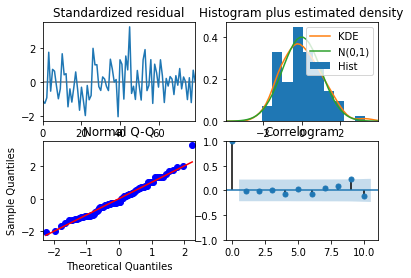

In [187]:
fresults_auto_SARIMA_rose.plot_diagnostics()
plt.show()

In [188]:
pred_dynamic = results_auto_SARIMA_rose.get_prediction(dynamic=True, full_results=True)

In [189]:
pred_dynamic_ci = pred_dynamic.conf_int()
predicted_auto_SARIMA_rose = results_auto_SARIMA_rose.get_forecast(steps=len(SARIMA_test['Rose']), alpha=0.05)

In [190]:
rose_forecasted = pred_dynamic.predicted_mean
SARIMA_test['rose_auto_forecasted'] = predicted_auto_SARIMA_rose.predicted_mean
SARIMA_test.head()

,Sparkling,Rose,spark_forecasted,spark_manual_forecasted,rose_auto_forecasted
YearMonth,,,,,
1991-01-31,1902,54.0,1429.827245,1580.075023,45.225371
1991-02-28,2049,55.0,1539.071712,1419.372679,63.055507
1991-03-31,1874,66.0,1706.370219,1868.377355,68.115932
1991-04-30,1279,65.0,1857.286162,1731.736049,61.823915
1991-05-31,1432,60.0,1500.491553,1660.103610,68.436375


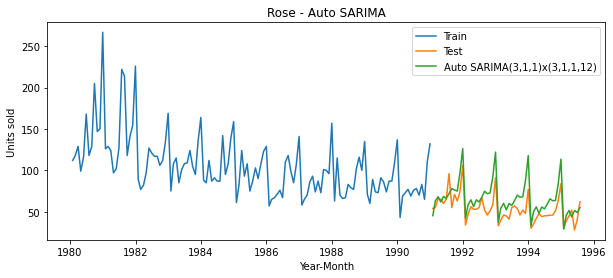

In [320]:
plt.figure(figsize=(10,4))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(SARIMA_test['rose_auto_forecasted'], label='Auto SARIMA(3,1,1)x(3,1,1,12)')
plt.xlabel('Year-Month')
plt.ylabel('Units sold')
plt.title('Rose - Auto SARIMA')
plt.legend(loc='best')

In [295]:
rmse_rose_model5_test = metrics.mean_squared_error(test['Rose'],SARIMA_test['rose_auto_forecasted'],squared=False)
mape_rose_model5_test = MAPE(test['Rose'],SARIMA_test['rose_auto_forecasted'])
print("For SARIMA forecast on the SRose Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_rose_model5_test, mape_rose_model5_test))

For SARIMA forecast on the SRose Testing Data:  RMSE is 16.823 and MAPE is 25.48


In [296]:
resultsDf_5_rose1 = pd.DataFrame({'Test RMSE': [rmse_rose_model5_test],'Test MAPE': [mape_rose_model5_test]},index=['Auto SARIMA(3,1,1)x(3,1,1,12)'])

rose_resultsDf2 = pd.concat([rose_resultsDf2, resultsDf_5_rose1])
rose_resultsDf2

,Test RMSE,Test MAPE
RegressionOnTime,15.268885,22.82
NaiveModel,79.718559,145.10
SimpleAverage,53.460350,94.93
2 point TMA,11.529278,13.54
4 point TMA,14.451364,19.49
6 point TMA,14.566269,20.82
9 point TMA,14.727594,21.01
"Auto SARIMA(3,1,1)x(3,1,1,12)",16.823064,25.48


## Manual SARIMA on Rose
### Build a version of the SARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots.

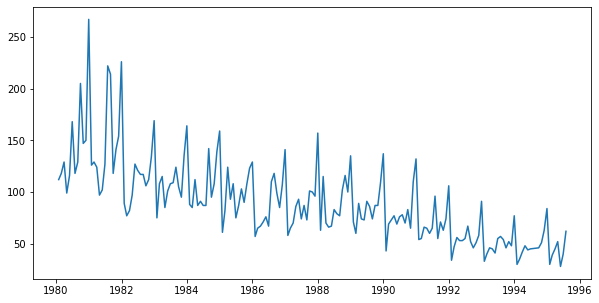

In [195]:
plt.figure(figsize=(10,5))
plt.plot(df['Rose'])

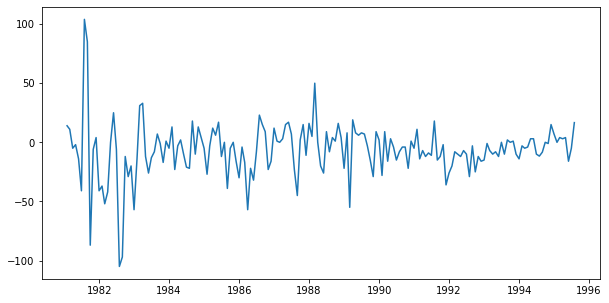

In [196]:
plt.figure(figsize=(10,5))
plt.plot(df['Rose'].diff(12).dropna())

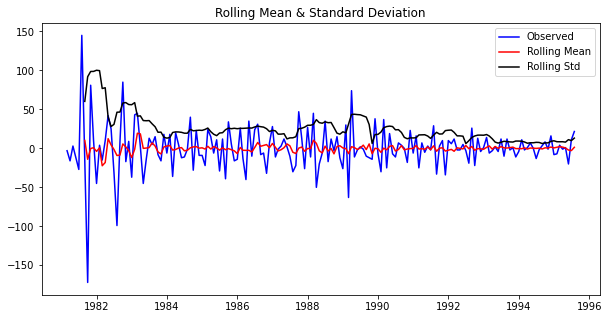

Results of Dickey-Fuller Test:
Test Statistic                  -4.605732
p-value                          0.000126
#Lags Used                      11.000000
Number of Observations Used    162.000000
Critical Value (1%)             -3.471374
Critical Value (5%)             -2.879552
Critical Value (10%)            -2.576373
dtype: float64 



In [197]:
plt.figure(figsize=(10,5))
test_stationarity((df['Rose'].diff(12).dropna()).diff().dropna(),'blue')

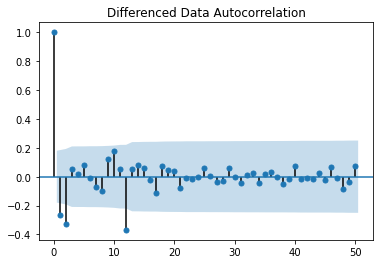

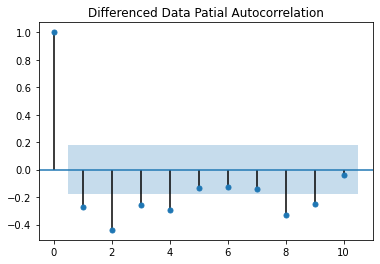

In [198]:
plot_acf((SARIMA_train['Rose'].diff(12).dropna()).diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf((SARIMA_train['Rose'].diff(12).dropna()).diff().dropna(),lags=10,title='Differenced Data Patial Autocorrelation')
plt.show()

In [199]:
manual_SARIMA_rose = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(4, 1, 2),
                                #seasonal_order=(0, 1, 1, 12),
                                seasonal_order=(0, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_rose = manual_SARIMA_rose.fit(maxiter=1000)
print(results_manual_SARIMA_rose.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(4, 1, 2)x(0, 1, 2, 12)   Log Likelihood                -384.369
Date:                            Sat, 25 Sep 2021   AIC                            786.737
Time:                                    00:13:24   BIC                            809.433
Sample:                                         0   HQIC                           795.898
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8966      0.134     -6.707      0.000      -1.159      -0.635
ar.L2          0.0167      0.171   

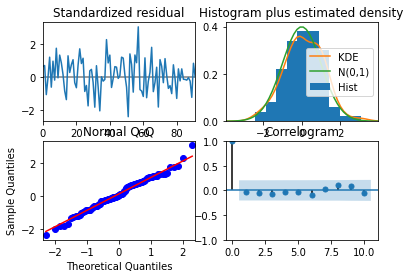

In [200]:
results_manual_SARIMA_rose.plot_diagnostics()
plt.show()

In [201]:
pred_dynamic = results_manual_SARIMA_rose.get_prediction(dynamic=True, full_results=True)

In [202]:
pred_dynamic_ci = pred_dynamic.conf_int()
predicted_manual_SARIMA_rose = results_manual_SARIMA_rose.get_forecast(steps=len(test['Rose']), alpha=0.05)

In [203]:
rose_log_forecasted = pred_dynamic.predicted_mean
SARIMA_test['rose_manual_forecasted'] = predicted_manual_SARIMA_rose.predicted_mean
SARIMA_test.head()

,Sparkling,Rose,spark_forecasted,spark_manual_forecasted,rose_auto_forecasted,rose_manual_forecasted
YearMonth,,,,,,
1991-01-31,1902,54.0,1429.827245,1580.075023,45.225371,44.732452
1991-02-28,2049,55.0,1539.071712,1419.372679,63.055507,64.210756
1991-03-31,1874,66.0,1706.370219,1868.377355,68.115932,65.112101
1991-04-30,1279,65.0,1857.286162,1731.736049,61.823915,68.454005
1991-05-31,1432,60.0,1500.491553,1660.103610,68.436375,61.424027


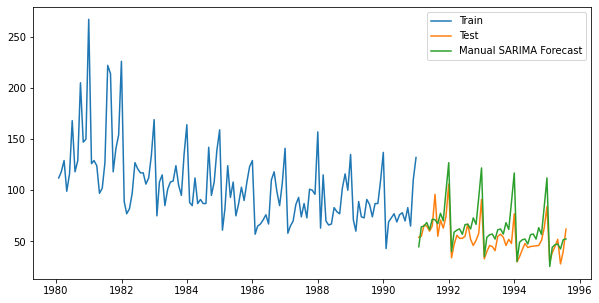

In [325]:
plt.figure(figsize=(10,5))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(SARIMA_test['rose_manual_forecasted'], label='Manual SARIMA Forecast')

plt.legend(loc='best')

In [205]:
rmse_rose_model5_test = metrics.mean_squared_error(test['Rose'],SARIMA_test['rose_manual_forecasted'],squared=False)
mape_rose_model5_test = MAPE(test['Rose'],SARIMA_test['rose_manual_forecasted'])
print("For SARIMA forecast on the Rose Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_rose_model5_test, mape_rose_model5_test))

For SARIMA forecast on the Rose Testing Data:  RMSE is 15.378 and MAPE is 22.16


In [298]:

resultsDf_5_rose2 = pd.DataFrame({'Test RMSE': [rmse_rose_model5_test],'Test MAPE': [mape_rose_model5_test]},index=['Manual SARIMA(4,1,2)x(0,1,1,12)'])
rose_resultsDf2 = pd.concat([rose_resultsDf2, resultsDf_5_rose2])
rose_resultsDf2

,Test RMSE,Test MAPE
RegressionOnTime,15.268885,22.82
NaiveModel,79.718559,145.10
SimpleAverage,53.460350,94.93
2 point TMA,11.529278,13.54
4 point TMA,14.451364,19.49
6 point TMA,14.566269,20.82
9 point TMA,14.727594,21.01
"Auto SARIMA(3,1,1)x(3,1,1,12)",16.823064,25.48
"Manual SARIMA(4,1,2)x(0,1,1,12)",16.823064,25.48


In [299]:
spark_resultsDf.sort_values(by=['Test RMSE'])

,Test RMSE,Test MAPE
"Auto SARIMA(3,1,3)x(3,1,0,12)",324.198328,9.48
"Manual SARIMA(3,1,1)x(1,1,2,12)",324.198328,9.48
2 point TMA,813.400684,19.70
4 point TMA,1156.589694,35.96
SimpleAverage,1275.081804,38.90
6 point TMA,1283.927428,43.86
9 point TMA,1346.278315,46.86
RegressionOnTime,1389.135175,50.15
NaiveModel,3864.279352,152.87
NaiveModel,3864.279352,152.87


In [300]:
spark_resultsDf.sort_values(by=['Test MAPE'])

,Test RMSE,Test MAPE
"Auto SARIMA(3,1,3)x(3,1,0,12)",324.198328,9.48
"Manual SARIMA(3,1,1)x(1,1,2,12)",324.198328,9.48
2 point TMA,813.400684,19.70
4 point TMA,1156.589694,35.96
SimpleAverage,1275.081804,38.90
6 point TMA,1283.927428,43.86
9 point TMA,1346.278315,46.86
RegressionOnTime,1389.135175,50.15
NaiveModel,3864.279352,152.87
NaiveModel,3864.279352,152.87


## SARIMA FOR SPARKLING


In [213]:
spark_full_data_model = sm.tsa.statespace.SARIMAX(df['Sparkling'],
                                order=(3,1,3),
                                seasonal_order=(1, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model_spark = spark_full_data_model.fit(maxiter=1000)
print(results_full_data_model_spark.summary())

                                        SARIMAX Results                                        
Dep. Variable:                               Sparkling   No. Observations:                  187
Model:             SARIMAX(3, 1, 3)x(1, 1, [1, 2], 12)   Log Likelihood               -1078.117
Date:                                 Sat, 25 Sep 2021   AIC                           2176.235
Time:                                         00:21:29   BIC                           2206.071
Sample:                                     01-31-1980   HQIC                          2188.358
                                          - 07-31-1995                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2060      0.088     -2.345      0.019      -0.378      -0

<Figure size 864x1008 with 0 Axes>

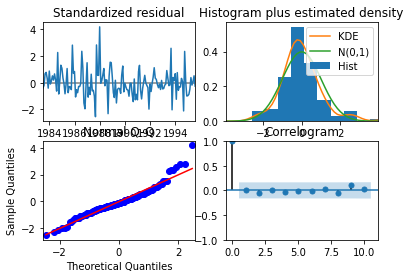

In [215]:

results_full_data_model_spark.plot_diagnostics();

In [216]:
predicted_spark_SARIMA_full_data = results_full_data_model_spark.get_forecast(steps=12)

In [220]:
rmse_spark_sarima_full = metrics.mean_squared_error(df['Sparkling'],results_full_data_model_spark.fittedvalues,squared=False)
mape_spark_sarima_full = MAPE(df['Sparkling'],results_full_data_model_spark.fittedvalues)
print("For SARIMA forecast on the Sparkling Full Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_spark_sarima_full, mape_spark_sarima_full))

For SARIMA forecast on the Sparkling Full Data:  RMSE is 580.452 and MAPE is 14.68


In [223]:
pred_full_manual_SARIMA_date = predicted_spark_SARIMA_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-31',end='1996-7-31', freq='M'))

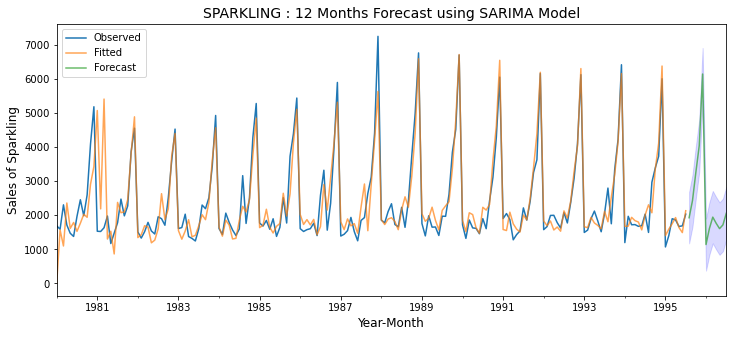

In [225]:
# plot the forecast along with the confidence band
plt.figure(figsize=(12,5))

axis = df['Sparkling'].plot(label='Observed')
results_full_data_model_spark.fittedvalues.plot(ax=axis, label='Fitted', alpha=0.7)
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='blue', alpha=.15)
plt.xlabel('Year-Month',fontsize=12)
plt.ylabel('Sales of Sparkling',fontsize=12)
plt.title('SPARKLING : 12 Months Forecast using SARIMA Model', fontsize=14)

plt.legend(loc='best')
plt.show()


Text(0.5, 1.0, 'SPARKLING : 12 Months Forecast')

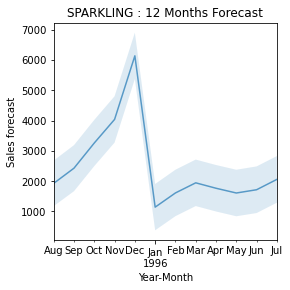

In [226]:
plt.figure(figsize=(4,4))
axis = pred_full_manual_SARIMA_date['mean'].plot( alpha=0.7)
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], alpha=.15)
plt.xlabel('Year-Month')
plt.ylabel('Sales forecast')
plt.title('SPARKLING : 12 Months Forecast', fontsize=12)


In [227]:
forecast = pd.DataFrame({'Sparkling':np.round(pred_full_manual_SARIMA_date['mean'],2)})
forecast

,Sparkling
1995-08-31,1925.82
1995-09-30,2427.05
1995-10-31,3258.60
1995-11-30,4037.14
1995-12-31,6137.71
1996-01-31,1140.13
1996-02-29,1609.25
1996-03-31,1943.26
1996-04-30,1764.12
1996-05-31,1607.08


### Rose


In [228]:
rose_full_data_model = sm.tsa.statespace.SARIMAX(df['Rose'],#rose_log_trans.values,
                                order= (4,1,1), #(1,0,0), #(4,1,1)x(0,1,1,12)
                                seasonal_order= (0,1,1,12), #(1, 0, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model_rose = rose_full_data_model.fit(maxiter=1000)
print(results_full_data_model_rose.summary())

                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  187
Model:             SARIMAX(4, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -664.135
Date:                            Sat, 25 Sep 2021   AIC                           1342.270
Time:                                    00:26:36   BIC                           1363.796
Sample:                                01-31-1980   HQIC                          1351.011
                                     - 07-31-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0913      0.084      1.093      0.274      -0.072       0.255
ar.L2         -0.1077      0.077   

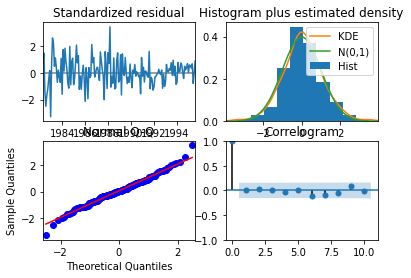

In [229]:
results_full_data_model_rose.plot_diagnostics();


In [230]:
predicted_rose_SARIMA_full_data = results_full_data_model_rose.get_forecast(steps=12)

In [231]:
#rmse_rose_sarima_full = metrics.mean_squared_error(df['Rose'],np.power(10,results_full_data_model_rose.fittedvalues),squared=False)
#mape_rose_sarima_full = MAPE(df['Rose'],np.power(10,results_full_data_model_rose.fittedvalues))
rmse_rose_sarima_full = metrics.mean_squared_error(df['Rose'],results_full_data_model_rose.fittedvalues,squared=False)
mape_rose_sarima_full = MAPE(df['Rose'],results_full_data_model_rose.fittedvalues)

print("For SARIMA forecast on the Rose Full Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_rose_sarima_full, mape_rose_sarima_full))

For SARIMA forecast on the Rose Full Data:  RMSE is 30.676 and MAPE is 19.40


In [232]:
pred_full_manual_SARIMA_date = predicted_rose_SARIMA_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-31',end='1996-7-31', freq='M'))

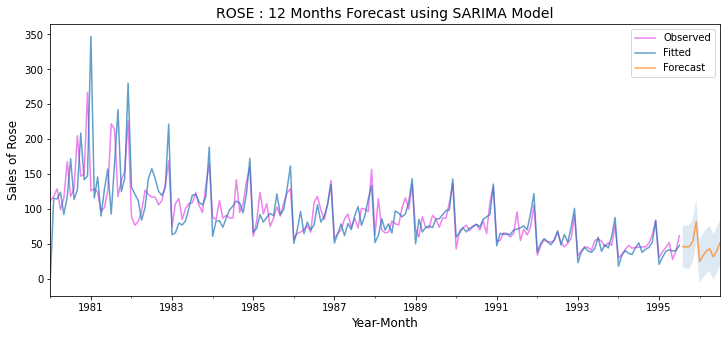

In [235]:
plt.figure(figsize=(12,5))

axis = df['Rose'].plot(label='Observed', color = 'violet')

#np.power(10,results_full_data_model_rose.fittedvalues).plot(label='Fitted', alpha=0.7, color = 'crimson')
#np.power(10,pred_full_manual_SARIMA_date['mean']).plot(ax=axis, label='Forecast', alpha=0.7, color = 'orangered')

results_full_data_model_rose.fittedvalues.plot(label='Fitted', alpha=0.7)
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)

axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], alpha=.15)
plt.xlabel('Year-Month',fontsize=12)
plt.ylabel('Sales of Rose',fontsize=12)
plt.title('ROSE : 12 Months Forecast using SARIMA Model', fontsize=14)

plt.legend(loc='best')
plt.show()

Text(0.5, 1.0, 'ROSE : 12 Months Forecast')

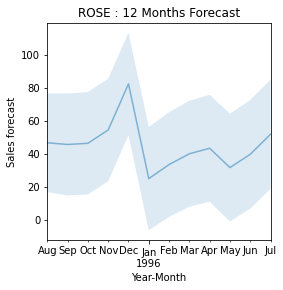

In [237]:
plt.figure(figsize=(4,4))
axis = pred_full_manual_SARIMA_date['mean'].plot( alpha=0.5)
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], alpha=.15)
plt.xlabel('Year-Month')
plt.ylabel('Sales forecast')
plt.title('ROSE : 12 Months Forecast', fontsize=12)


In [238]:
forecast2 = pd.DataFrame({'ROSE':np.round(pred_full_manual_SARIMA_date['mean'],2)})
forecast2

,ROSE
1995-08-31,46.54
1995-09-30,45.51
1995-10-31,46.23
1995-11-30,54.32
1995-12-31,82.21
1996-01-31,24.81
1996-02-29,33.36
1996-03-31,39.87
1996-04-30,43.23
1996-05-31,31.53


# END